CRIM: This is the per capita crime rate by town
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
INDUS: This is the proportion of non-retail business acres per town.
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This is the nitric oxides concentration (parts per 10 million)
RM: This is the average number of rooms per dwelling
AGE: This is the proportion of owner-occupied units built prior to 1940
DIS: This is the weighted distances to five Boston employment centers
RAD: This is the index of accessibility to radial highways
TAX: This is the full-value property-tax rate per $10,000
PTRATIO: This is the pupil-teacher ratio by town
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
LSTAT: This is the percentage lower status of the population
MEDV: This is the median value of owner-occupied homes in $1000s

- avg sale price of broker and seller
- weather indices and population

The company was the subject of a class-action lawsuit, filed in 2017 by Chicago homeowners who claimed it misled homebuyers by providing them with very low figures. The plaintiffs also stated most users treated Zestimates like appraisals. According to a report by Market Watch, Zillow, said the lawsuit had no merit, denying that its Zestimates were appraisals. Instead, it called them a reference point where users can start their search for home values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Housing Price Predictor

In [986]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from FormatScripts import hello
from src.housing_scripts import *

pd.options.display.max_columns = None
%matplotlib inline

## Functions used

### Read-in CSV for Title Data

In [8]:
df_santa_monica = pd.read_csv('Santa Monica.csv')

df_venice = pd.read_csv('Venice.csv')

df_playavista = pd.read_csv('Playa Vista.csv')

df_mdr = pd.read_csv('Marina Del Rey.csv')

FileNotFoundError: [Errno 2] File b'Santa Monica.csv' does not exist: b'Santa Monica.csv'

In [9]:
df = pd.concat([df_santa_monica,df_venice,df_playavista,df_mdr],ignore_index=True)

NameError: name 'df_santa_monica' is not defined

In [9]:
df.shape

(39652, 48)

In [10]:
df['Site Address Zip'].unique()

array([90402, 90403, 90401, 90405, 90404, 90292, 90291, 90094])

### clean data only pull house sales from the past 3 years

In [12]:
df['Sale Date']= df['Sale Date'].apply(string)
df['Sale Year'] = df['Sale Date'].apply(lambda x: x[-4:])

In [13]:
# df = df[(df['Sale Year']=='2015') | (df['Sale Year']=='2016') | (df['Sale Year']=='2017') | 
#         (df['Sale Year']=='2018') | (df['Sale Year']=='2019')].reset_index()

In [14]:
df.shape

(39652, 49)

In [16]:
df = df[['Parcel Number', 'Site Address', 'Site Address Unit Number', 'Site Address City', 
        'Year Built', 'Bedrooms',
         'Bathrooms', 'Sale Date',
        'Sales Price', 'Prior Sale Date', 'Lot Area SQFT','Owner Occupied']]

In [17]:
df['Site Address'].dropna(inplace=True)

In [18]:
df['Site Address Unit Number'].fillna(0,inplace=True)

In [19]:
df['Site Address Unit Number'] = df['Site Address Unit Number'].apply(lambda x: roound(x))

In [20]:
df.head(3)

Parcel Number  Site Address Site Address Unit Number Site Address City  \
0  2205-028-004   449 14Th St                        0      Santa Monica   
1  3009-009-003  1158 26Th St                      210      Santa Monica   
2  3027-010-033   837 18Th St                        6      Santa Monica   

   Year Built  Bedrooms  Bathrooms   Sale Date  Sales Price Prior Sale Date  \
0         NaN       NaN        NaN  09/19/2008          NaN      01/21/1969   
1         NaN       NaN        NaN  10/31/1997      12000.0             NaN   
2         NaN       NaN        NaN  05/12/2016     540003.0      05/02/2014   

   Lot Area SQFT Owner Occupied  
0         3091.0              Y  
1         8524.0              Y  
2        46304.0              Y

In [21]:
df['addy'] = df['Site Address'] + df['Site Address Unit Number'].apply(add_unit)

In [22]:
df.addy.dropna(inplace=True)

In [23]:
df.addy = df.addy.apply(lower)

In [24]:
df.addy.sample(10)

29978             700 main st 24
29714           1221 preston way
23497          445 howland canal
39603    4337 marina city dr 945
26387         825 california ave
14049            1501 pearl st 1
23236                40 29th ave
26109            810 indiana ave
1853        1544 1/2 stanford st
19190            1040 4th st 108
Name: addy, dtype: object

# MLS DATA
+ Load Data
+ Check for Null Values

In [8]:
full_list = []
for i in range(1,131):
    x = pd.read_csv('houses/Full ({}).csv'.format(i))
    full_list.append(x)

In [9]:
MLS = pd.concat(full_list,ignore_index=True)

In [10]:
data = MLS

In [116]:
MLS.to_csv('westcoastbestcoast.csv')

In [110]:
data.head()

AccessibilityFeatures  AccountingType  LotSizeAcres AdNumber  \
0                       NaN             NaN        8.5329      NaN   
1                       NaN             NaN        0.1794      NaN   
2                       NaN             NaN        0.1643      NaN   
3  Grab Bars In Bathroom(s)             NaN        0.1547      NaN   
4                       NaN             NaN        0.4101      NaN   

   AdditionalDimensions  AdvertisingExpense  \
0                   NaN                 NaN   
1                   NaN                 NaN   
2                   NaN                 NaN   
3                   NaN                 NaN   
4                   NaN                 NaN   

                                      PrivateRemarks  Amperage  \
0  Complex is self-managed and well maintained. T...       NaN   
1  Den was originally a third bedroom. Trustee sa...       NaN   
2  Please contact LA1 for all showing requests an...       NaN   
3  Property is being sold "As-Is", condition. No ...       NaN   
4  No showings before first open house.  Open hou...       NaN   

   AnchorsCoTenants                                         Appliances  \
0               NaN  Disposal, Water Heater, Oven, Refrigerator, Di...   
1               NaN           Disposal, Gas Water Heater, Refrigerator   
2               NaN                                           Gas Oven   
3               NaN                Freezer, Refrigerator, Water Heater   
4               NaN                           Refrigerator, Dishwasher   

  AppliancesYN        MLSAreaMajor Assessments AssessmentsYN ParcelNumber  \
0         True  C14 - Santa Monica         NaN           NaN  4.27001e+09   
1         True  C14 - Santa Monica         NaN           NaN  4.27001e+09   
2         True  C14 - Santa Monica         NaN           NaN  4.28701e+09   
3         True  C14 - Santa Monica        None         False  4.27301e+09   
4         True  C14 - Santa Monica         NaN           NaN  4.27001e+09   

   AssetClass  LeaseAssignableYN  \
0         NaN                NaN   
1         NaN                NaN   
2         NaN                NaN   
3         NaN                NaN   
4         NaN                NaN   

                                AssociationAmenities  AssociationFee  \
0  Pool, Spa/Hot Tub, Sauna, Tennis Court(s), Clu...           520.0   
1                                                NaN             NaN   
2                               Earthquake Insurance           298.0   
3                                                NaN             0.0   
4                                              Other           224.0   

  AssociationFeeFrequency  AssociationFee2 AssociationFee2Frequency  \
0                     NaN              NaN                      NaN   
1                     NaN              NaN                      NaN   
2                     NaN              NaN                      NaN   
3                     NaN              NaN                      NaN   
4                     NaN              NaN                      NaN   

               AssociationName AssociationName2 AssociationManagementName  \
0  Village Parkway Association              NaN                       NaN   
1                          NaN              NaN                       NaN   
2              2444 4th St HOA              NaN                       NaN   
3                          NaN              NaN                       NaN   
4           2427 Centinela HOA              NaN                       NaN   

  AssociationManagementName2 AssociationPhone AssociationPhoneExt  \
0                        NaN              NaN                 NaN   
1                        NaN              NaN                 NaN   
2                        NaN              NaN                 NaN   
3                        NaN              NaN                 NaN   
4                        NaN              NaN                 NaN   

  AssociationPhone2  AssociationPhone2Ext 

In [111]:
data.OpenHouseCount.value_counts()

0.0      28423
2.0       6624
3.0       4978
1.0       4466
4.0       3004
5.0       1963
6.0       1382
7.0        956
8.0        747
9.0        658
10.0       519
11.0       387
12.0       256
13.0       207
14.0       155
15.0       145
16.0       136
18.0        79
17.0        76
19.0        63
21.0        44
20.0        39
22.0        38
25.0        29
23.0        27
24.0        26
26.0        18
27.0        13
31.0        12
30.0        11
         ...  
33.0         8
39.0         8
32.0         7
37.0         6
35.0         6
44.0         5
36.0         5
38.0         4
34.0         4
46.0         3
29.0         3
49.0         3
56.0         2
43.0         2
50.0         1
64.0         1
65.0         1
78.0         1
58.0         1
47.0         1
40.0         1
66.0         1
51.0         1
42.0         1
55.0         1
52.0         1
41.0         1
97.0         1
155.0        1
60.0         1
Name: OpenHouseCount, Length: 61, dtype: int64

In [68]:
data.ParkingFeatures.value_counts()

Garage - Two Door                                                                                                                        5322
Garage                                                                                                                                   5207
Community Structure                                                                                                                      2026
Driveway                                                                                                                                 1380
Assigned                                                                                                                                 1276
Carport                                                                                                                                  1236
Garage, Garage Door Opener                                                                                                               1116
Garage

In [118]:
data['full name'] = data['ListAgentFirstName'] + ' ' + data['ListAgentLastName']

In [119]:
data[data['ListAgentFirstName'] == 'Howard']

AccessibilityFeatures  AccountingType  LotSizeAcres AdNumber  \
628                     NaN             NaN           NaN      NaN   
710                     NaN             NaN           NaN      NaN   
723                     NaN             NaN           NaN      NaN   
1741                    NaN             NaN           NaN      NaN   
1815                    NaN             NaN           NaN      NaN   
1818                    NaN             NaN           NaN      NaN   
3762                    NaN             NaN        0.0700      NaN   
6635                    NaN             NaN           NaN      NaN   
6942                    NaN             NaN           NaN      NaN   
8845                    NaN             NaN           NaN      NaN   
8933                    NaN             NaN           NaN      NaN   
11112                   NaN             NaN        0.2040      NaN   
15122                   NaN             NaN           NaN      NaN   
15458                   NaN             NaN        0.3270      NaN   
16820                   NaN             NaN        0.1720      NaN   
17119                   NaN             NaN           NaN      NaN   
19559                   NaN             NaN        4.4675      NaN   
20519                   NaN             NaN           NaN      NaN   
21177                   NaN             NaN           NaN      NaN   
22730                   NaN             NaN        0.0537      NaN   
24734                   NaN             NaN        0.1010      NaN   
24735                   NaN             NaN           NaN      NaN   
25102                   NaN             NaN        0.0960      NaN   
30687                   NaN             NaN        0.1381      NaN   
31918                   NaN             NaN        0.1394      NaN   
32028                   NaN             NaN           NaN      NaN   
34853     No Interior Steps             NaN        0.1306      NaN   
35604                   NaN             NaN        0.1837      NaN   
35952                   NaN             NaN           NaN      NaN   
37552                   NaN             NaN        0.1393      NaN   
42643                   NaN             NaN        0.3331      NaN   
44840                   NaN             NaN        0.4480      NaN   
49347                   NaN             NaN        0.0780      NaN   
49815                   NaN             NaN        0.3792      NaN   
50016                   NaN             NaN        0.1011      NaN   
50353                   NaN             NaN        0.1700      NaN   
51593                   NaN             NaN        0.2152      NaN   
52107                   NaN             NaN           NaN      NaN   

       AdditionalDimensions  AdvertisingExpense  \
628                     NaN                 NaN   
710                     NaN                 NaN   
723                     NaN                 NaN   
1741                    NaN                 NaN   
1815                    NaN                 NaN   
1818                    NaN                 NaN   
3762                    NaN                 NaN   
6635                    NaN                 NaN   
6942                    NaN                 NaN   
8845                    NaN                 NaN   
8933                    NaN                 NaN   
11112                   NaN                 NaN   
15122                   NaN                 NaN   
15458                   NaN                 NaN   
16820                   NaN                 NaN   
17119                   NaN                 NaN   
19559                   NaN                 NaN   
20519                   NaN                 NaN   
21177                   NaN                 NaN   
22730                   NaN                 NaN   
24734                   NaN                 NaN   
24735                   NaN                 NaN   
25102                   NaN                 NaN   
30687                   NaN                 NaN   


In [190]:
data.shape

(56201, 596)

In [15]:
data.Flooring.value_counts()

Wood                                              18465
Carpet, Wood                                       8930
Carpet                                             4776
Stone, Wood                                        1627
See Remarks                                        1432
Tile, Wood                                         1375
Laminate                                           1176
Carpet, Stone, Wood                                 927
Carpet, Stone                                       854
Carpet, Vinyl                                       837
Carpet, Tile                                        655
See Remarks, Wood                                   591
Vinyl, Wood                                         579
Carpet, Tile, Wood                                  484
Carpet, Vinyl, Wood                                 439
Laminate, Wood                                      375
Laminate, Carpet                                    372
Wood, Carpet, Tile                              

In [112]:
data.ListOfficeName.value_counts()

Coldwell Banker Residential Br       8339
Compass                              2789
Berkshire Hathaway HomeService       2611
Sotheby's International Realty       2196
RE/MAX ESTATE PROPERTIES             1917
Keller Williams-Santa Monica         1764
The Agency                           1231
Teles Properties, Inc.                919
Keller Williams Silicon Beach         875
Hilton & Hyland                       819
Rodeo Realty - Beverly Hills          755
Keller Williams Beverly Hills         753
John Aaroe Group                      660
Gibson International                  637
Halton Pardee and Partners, In        618
Pardee Properties, Inc.               568
Pacific Union International           560
Keller Williams Hollywood Hill        485
Keller Williams Realty Los Fel        424
Douglas Elliman                       414
Douglas Elliman of California,        389
Deasy Penner & Partners               381
Coldwell Banker-Montana               380
Partners Trust Brentwood          

In [113]:
MLS = data[['ClosePrice','ParcelNumber','LotSizeAcres','PrivateRemarks',
            'OriginalListPrice',
            'PublicRemarks','Appliances',
            'AppliancesYN','MLSAreaMajor',
            'AssociationAmenities',
            'AssociationFee','BathroomsTotalInteger','BathroomsFull',
            'BedroomsTotal','City', 'CommonWalls','Cooling','CoolingYN',
            'CountyOrParish','CumulativeDaysOnMarket','CurrentPrice',
            'FireplaceYN','HeatingYN','Latitude','Longitude','LaundryYN','OriginalListPrice',
            'LotSizeSquareFeet','ParkingTotal', 'NumberOfUnitsTotal','OccupantType',
            'OnMarketTimestamp','OpenHouseCount','ParkingYN','PatioYN','PoolPrivateYN',
            'PricePerSquareFoot','PropertyType','PropertySubType','RoomType',
            'BuyerAgencyCompensation','UnitNumber','LivingArea','StateOrProvince',
            'StoriesTotal','StreetName','StreetNumberNumeric','StreetSuffix',
            'SyndicationRemarks','ViewYN','YearBuilt','PostalCode','Zoning',
            'StandardStatus','CloseDate']]




In [114]:
MLS.describe()

ClosePrice   LotSizeAcres  OriginalListPrice  AssociationFee  \
count  4.603000e+04   43520.000000       5.526300e+04    38291.000000   
mean   1.551649e+06      10.631266       1.700529e+06      443.647303   
std    2.108248e+06    1149.925196       7.579586e+06     3349.679536   
min    0.000000e+00       0.000000       0.000000e+00        0.000000   
25%    6.990000e+05       0.126300       6.990000e+05       75.000000   
50%    1.070000e+06       0.172100       1.095000e+06      345.000000   
75%    1.710000e+06       0.448200       1.799000e+06      523.000000   
max    1.197500e+08  201934.000000       1.199000e+09   525000.000000   

       BathroomsTotalInteger  BathroomsFull  BedroomsTotal  \
count            56178.00000   40439.000000   56197.000000   
mean                 2.60481       2.251737       2.716052   
std                  1.43453       1.259705       1.191471   
min                  0.00000       0.000000       0.000000   
25%                  2.00000       1.000000       2.000000   
50%                  2.00000       2.000000       3.000000   
75%                  3.00000       3.000000       3.000000   
max                 27.00000      20.000000      22.000000   

       CumulativeDaysOnMarket  CurrentPrice      Latitude     Longitude  \
count            56201.000000  5.620100e+04  56196.000000  56196.000000   
mean               773.565097  1.579574e+06     34.027833   -118.424908   
std               1795.147835  2.080020e+06      0.333444      1.109546   
min                  0.000000  0.000000e+00     -1.000000   -120.713471   
25%                 16.000000  6.950000e+05     33.994772   -118.479084   
50%                 55.000000  1.083000e+06     34.027509   -118.450850   
75%                155.000000  1.770000e+06     34.057068   -118.401712   
max              18449.000000  1.197500e+08     36.272511     -1.000000   

       OriginalListPrice  LotSizeSquareFeet   ParkingTotal  \
count       5.526300e+04       4.383100e+04   19680.000000   
mean        1.700529e+06       8.674302e+04      15.181580   
std         7.579586e+06       6.906544e+06    1883.779999   
min         0.000000e+00       0.000000e+00       0.000000   
25%         6.990000e+05       5.478000e+03       1.000000   
50%         1.095000e+06       7.500000e+03       2.000000   
75%         1.799000e+06       1.950000e+04       2.000000   
max         1.199000e+09       1.317690e+09  264267.000000   

       NumberOfUnitsTotal  OpenHouseCount  PricePerSquareFoot  \
count        25182.000000    55574.000000        52802.000000   
mean            36.270034        2.102656          744.137981   
std             95.763664        3.769255          362.417435   
min              0.000000        0.000000            0.000000   
25%              0.000000        0.000000          526.057500   
50%              1.000000        0.000000          678.415000   
75%             20.000000        3.000000          887.510000   
max           3117.000000      155.000000         8278.150000   

       BuyerAgencyCompensation     LivingArea  StoriesTotal  \
count             56178.000000   53627.000000  44671.000000   
mean                 25.988438    1968.853488      2.255020   
std                 769.130406    1847.224720      3.552393   
min                   0.000000       0.000000      0.000000   
25%                   2.500000    1196.000000      1.000000   
50%                   2.500000    1608.000000      2.000000   
75%                   2.500000    2267.000000      2.000000   
max               50000.000000  197520.000000    253.000000   

       StreetNumberNumeric     YearBuilt    PostalCode  
count         56201.000000  54947.000000  56201.000000  
mean           3654.114873   1961.702222  90221.479600  
std            4023.722648    123.763441    153.837696  
min               0.000000      0.000000  90019.000000  
25%             888.000000   1947.000000  90049.000000  
50%            1914.000000   1971.000000  90291.000000  
75% 

## Format Address for merge

In [115]:
MLS.UnitNumber.fillna(0,inplace=True)
MLS['addy'] = MLS['StreetNumberNumeric'].apply(lambda x: str(x)) + ' ' + MLS.StreetName.apply(lower) + MLS.StreetSuffix.apply(abr_suf) + MLS.UnitNumber.apply(add_unit)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
MLS.addy.sample(10)

3545                152 hart ave nan
19178        4337 marina city dr 539
29431    5625 crescent park west 320
22496             3950 via dolce 506
26859              417 venice wy nan
7546               900 euclid st 309
28549                6692 para wy 31
45803        10645 wilshire blvd 303
50440          3580 multiview dr nan
37183               2427 century nan
Name: addy, dtype: object

In [117]:
MLS.shape

(56201, 56)

# Merge Datasets

In [118]:
merge = MLS

# Prepping Data For Modeling

In [119]:
daddy = merge
master = daddy[['addy','City','PostalCode',
                'ClosePrice','CloseDate',
                'CurrentPrice','YearBuilt','LivingArea', 
                'BedroomsTotal','BathroomsTotalInteger',
                'LotSizeAcres','LotSizeSquareFeet',
                'Latitude','Longitude', 
                'StoriesTotal','PropertyType',
                'PropertySubType','RoomType',
                'AppliancesYN','CoolingYN', 'FireplaceYN', 
                'HeatingYN','LaundryYN','ParkingYN',
                'PatioYN', 'PoolPrivateYN','CommonWalls','ViewYN','OriginalListPrice'
]]

## Remove Outliers

In [120]:
master[master.BathroomsTotalInteger>15].head(3)

addy           City  PostalCode   ClosePrice  \
10497     8801 cedros ave 4  Panorama City       90402     335000.0   
36808    300 delfern dr nan    Los Angeles       90077   40800000.0   
36923  301 carolwood dr nan    Los Angeles       90077  100000000.0   

                    CloseDate  CurrentPrice  YearBuilt  LivingArea  \
10497  08/28/2018 12:00:00 AM      335000.0     1981.0      1476.0   
36808  04/21/2017 12:00:00 AM    40800000.0     1938.0     14905.0   
36923  10/20/2016 12:00:00 AM   100000000.0     2016.0     30000.0   

       BedroomsTotal  BathroomsTotalInteger  LotSizeAcres  LotSizeSquareFeet  \
10497            2.0                   16.0        1.0860            47304.0   
36808           11.0                   16.0        2.1551            93875.0   
36923           10.0                   20.0        2.1739            94696.0   

        Latitude   Longitude  StoriesTotal PropertyType  \
10497  34.229988 -118.454036           0.0  Residential   
36808  34.083602 -118.429899           3.0  Residential   
36923  34.083753 -118.428555           2.0  Residential   

               PropertySubType  \
10497              Condominium   
36808  Single Family Residence   
36923  Single Family Residence   

                                                RoomType AppliancesYN  \
10497  Master Bedroom, All Bedrooms Up, Living Room, ...         True   
36808  Jack & Jill, Walk-In Closet, Dressing Area, Se...         True   
36923                                        See Remarks          NaN   

      CoolingYN FireplaceYN HeatingYN LaundryYN ParkingYN PatioYN  \
10497      True        True      True      True      True     NaN   
36808      True        True      True      True      True     NaN   
36923      True        True      True      True      True     NaN   

      PoolPrivateYN      CommonWalls ViewYN  OriginalListPrice  \
10497          True              NaN  False           335000.0   
36808          True  No Common Walls   True         45000000.0   
36923          True  No Common Walls   True        150000000.0   

       OriginalListPrice  
10497           335000.0  
36808         45000000.0  
36923        150000000.0

In [121]:
master.columns

Index(['addy', 'City', 'PostalCode', 'ClosePrice', 'CloseDate', 'CurrentPrice',
       'YearBuilt', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger',
       'LotSizeAcres', 'LotSizeSquareFeet', 'Latitude', 'Longitude',
       'StoriesTotal', 'PropertyType', 'PropertySubType', 'RoomType',
       'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
       'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'CommonWalls', 'ViewYN',
       'OriginalListPrice', 'OriginalListPrice'],
      dtype='object')

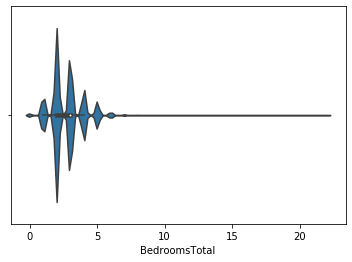

In [122]:
sns.violinplot(master.BedroomsTotal)

In [123]:
sns.violinplot(master.ClosePrice)

In [124]:
master = master[(master['ClosePrice'] > 400000) & (master['ClosePrice']<20000000) & (master['StoriesTotal']<=4)]
master = master[master['Latitude'] > 0]
master = master[master['YearBuilt'] > 0]
master = master[master['BedroomsTotal'] > 0]
master = master[master['BedroomsTotal'] < 10]
master = master[master['BathroomsTotalInteger'] > 0]
master = master[master['BathroomsTotalInteger'] < 16]
master = master[(master['LotSizeSquareFeet'] < 100000) & (master['LotSizeSquareFeet'] > 0)]
master = master[(master['LivingArea'] < 14000) & (master['LivingArea'] > 0)]

In [125]:
master.shape

(26414, 30)

# Get Dummies
+ Property Type

In [126]:
master.PropertySubType.value_counts()

Single Family Residence    18509
Condominium                 6496
Townhouse                   1385
Duplex                         9
Commercial/Residential         6
Loft                           3
Cabin                          1
Triplex                        1
Manufactured On Land           1
Stock Cooperative              1
Name: PropertySubType, dtype: int64

In [127]:
master.PropertySubType = master.PropertySubType.apply(prop_type_update)
prop_type_df = pd.get_dummies(master.PropertySubType)
master = pd.concat([master,prop_type_df],axis=1)

In [128]:
master = master[['ClosePrice','YearBuilt', 
                 'OriginalListPrice',
                'PostalCode','PropertySubType',
                'BedroomsTotal','BathroomsTotalInteger', 
                'Latitude','Longitude','LivingArea','StoriesTotal',
                'LotSizeSquareFeet','CloseDate','CommonWalls',
                'Single Family Residence', 'Condominium','Multi','Townhouse',
                'AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN','ViewYN']]

In [129]:
master.shape

(26414, 28)

## Impute Missing Values

In [130]:
master.head()

ClosePrice  YearBuilt  OriginalListPrice  OriginalListPrice  PostalCode  \
1   1890000.0     1941.0          1800000.0          1800000.0       90405   
2    720000.0     1964.0           775000.0           775000.0       90405   
3   1550000.0     1936.0          1695000.0          1695000.0       90405   
4    525000.0     1950.0           499000.0           499000.0       90405   
5   1211000.0     1967.0           995000.0           995000.0       90405   

           PropertySubType  BedroomsTotal  BathroomsTotalInteger   Latitude  \
1  Single Family Residence            2.0                    1.0  34.020163   
2              Condominium            1.0                    1.0  34.004771   
3  Single Family Residence            3.0                    2.0  34.019241   
4              Condominium            1.0                    1.0  34.026334   
5              Condominium            3.0                    2.0  34.004162   

    Longitude  LivingArea  StoriesTotal  LotSizeSquareFeet  \
1 -118.460235      1265.0           1.0             7814.0   
2 -118.482761       665.0           2.0             7159.0   
3 -118.464033      1471.0           1.0             6740.0   
4 -118.452100       627.0           2.0            17862.0   
5 -118.476180      1130.0           2.0             6416.0   

                CloseDate      CommonWalls  Single Family Residence  \
1  01/24/2018 12:00:00 AM  No Common Walls                        1   
2  04/10/2018 12:00:00 AM              NaN                        0   
3  02/21/2018 12:00:00 AM  No Common Walls                        1   
4  01/11/2018 12:00:00 AM              NaN                        0   
5  01/24/2018 12:00:00 AM              NaN                        0   

   Condominium  Multi  Townhouse AppliancesYN CoolingYN FireplaceYN HeatingYN  \
1            0      0          0         True     False        True      True   
2            1      0          0         True     False       False      True   
3            0      0          0         True     False        True      True   
4            1      0          0         True     False       False       NaN   
5            1      0          0         True     False       False      True   

  LaundryYN ParkingYN PatioYN PoolPrivateYN ViewYN  
1      True      True     NaN         False  False  
2      True      True     NaN         False   True  
3      True      True    True         False  False  
4      True      True    True         False   True  
5      True      True    True         False   True

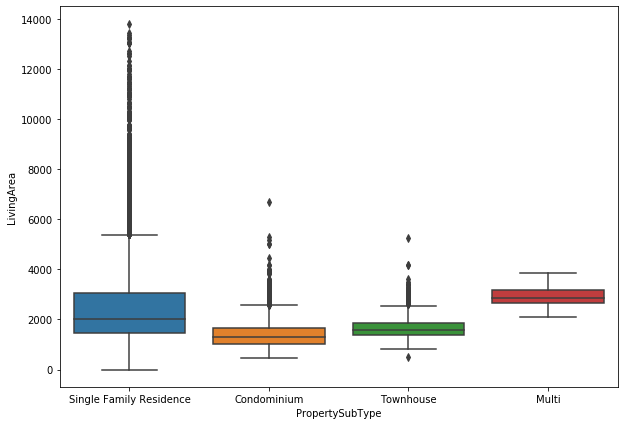

In [131]:
plt.figure(figsize=(10,7))
sns.boxplot(x='PropertySubType', y='LivingArea',data=master)

In [132]:
np.mean(master[master.PropertySubType == 'Condominium']['LivingArea'])

1378.3468225880904

In [133]:
def impute_livingarea(cols):
    LivingArea = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(LivingArea):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['LivingArea'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['LivingArea'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['LivingArea'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['LivingArea'])
    else:
        return LivingArea
    


In [134]:
def impute_LotSizeSquareFeet(cols):
    LotSizeSquareFeet = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(LotSizeSquareFeet):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['LotSizeSquareFeet'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['LotSizeSquareFeet'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['LotSizeSquareFeet'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['LotSizeSquareFeet'])
    else:
        return LotSizeSquareFeet

In [135]:
def impute_YearBuilt(cols):
    YearBuilt = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(YearBuilt):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['YearBuilt'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['YearBuilt'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['YearBuilt'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['YearBuilt'])
    else:
        return YearBuilt

In [136]:
def impute_BathroomsTotalInteger(cols):
    BathroomsTotalInteger = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(BathroomsTotalInteger):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['BathroomsTotalInteger'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['BathroomsTotalInteger'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['BathroomsTotalInteger'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['BathroomsTotalInteger'])
    else:
        return BathroomsTotalInteger
    
def impute_BedroomsTotal(cols):
    BedroomsTotal = cols[0]
    PropertySubType = cols[1]
    if pd.isnull(BedroomsTotal):
        if PropertySubType == 'Single Family Residence':
            return np.mean(master[master.PropertySubType == 'Single Family Residence']['BedroomsTotal'])
        elif PropertySubType == 'Condominium':
            return np.mean(master[master.PropertySubType == 'Condominium']['BedroomsTotal'])
        elif PropertySubType == 'Townhouse':
            return np.mean(master[master.PropertySubType == 'Townhouse']['BedroomsTotal'])
        else:
            return np.mean(master[master.PropertySubType == 'Multi']['BedroomsTotal'])
    else:
        return BedroomsTotal

In [137]:
master.LivingArea = master[['LivingArea','PropertySubType']].apply(impute_livingarea,axis=1)
master.LotSizeSquareFeet = master[['LotSizeSquareFeet','PropertySubType']].apply(impute_LotSizeSquareFeet,axis=1)
master.YearBuilt = master[['YearBuilt','PropertySubType']].apply(impute_YearBuilt,axis=1)
master.BathroomsTotalInteger = master[['BathroomsTotalInteger','PropertySubType']].apply(impute_BathroomsTotalInteger,axis=1)
master.BedroomsTotal = master[['BedroomsTotal','PropertySubType']].apply(impute_BedroomsTotal,axis=1)

In [138]:
master.StoriesTotal.fillna(1, inplace=True)
master.StoriesTotal.replace(0,1, inplace=True)
# master.LivingArea.fillna(master.LivingArea.mean(), inplace=True)
# master.LivingArea.replace(0,master.LivingArea.mean(), inplace=True)
# master['LotSizeSquareFeet'].fillna(master['LotSizeSquareFeet'].mean(), inplace=True)
# master['LotSizeSquareFeet'].replace(0,master['LotSizeSquareFeet'].mean(), inplace=True)

# master.BathroomsTotalInteger.fillna(master.BathroomsTotalInteger.mean(), inplace=True)
# master.BathroomsTotalInteger.replace(0,master.BathroomsTotalInteger.mean(), inplace=True)

# master.BedroomsTotal.fillna(master.BedroomsTotal.mean(), inplace=True)
# master.BedroomsTotal.replace(0,master.BedroomsTotal.mean(), inplace=True)
# master['YearBuilt'].fillna(master['YearBuilt'].mean(), inplace=True)
# master['YearBuilt'].replace(0,master['YearBuilt'].mean(), inplace=True)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [139]:
master.CommonWalls = master.CommonWalls.map(wall_clean)

In [140]:
master.CommonWalls.value_counts()

1    15740
0    10674
Name: CommonWalls, dtype: int64

In [141]:
col_list = ['AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                 'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN','CommonWalls','ViewYN'
           ]

impute_features(master, col_list)

In [142]:
master.head()

ClosePrice  YearBuilt  OriginalListPrice  OriginalListPrice  PostalCode  \
1   1890000.0     1941.0          1800000.0          1800000.0       90405   
2    720000.0     1964.0           775000.0           775000.0       90405   
3   1550000.0     1936.0          1695000.0          1695000.0       90405   
4    525000.0     1950.0           499000.0           499000.0       90405   
5   1211000.0     1967.0           995000.0           995000.0       90405   

           PropertySubType  BedroomsTotal  BathroomsTotalInteger   Latitude  \
1  Single Family Residence            2.0                    1.0  34.020163   
2              Condominium            1.0                    1.0  34.004771   
3  Single Family Residence            3.0                    2.0  34.019241   
4              Condominium            1.0                    1.0  34.026334   
5              Condominium            3.0                    2.0  34.004162   

    Longitude  LivingArea  StoriesTotal  LotSizeSquareFeet  \
1 -118.460235      1265.0           1.0             7814.0   
2 -118.482761       665.0           2.0             7159.0   
3 -118.464033      1471.0           1.0             6740.0   
4 -118.452100       627.0           2.0            17862.0   
5 -118.476180      1130.0           2.0             6416.0   

                CloseDate  CommonWalls  Single Family Residence  Condominium  \
1  01/24/2018 12:00:00 AM            1                        1            0   
2  04/10/2018 12:00:00 AM            0                        0            1   
3  02/21/2018 12:00:00 AM            1                        1            0   
4  01/11/2018 12:00:00 AM            0                        0            1   
5  01/24/2018 12:00:00 AM            0                        0            1   

   Multi  Townhouse  AppliancesYN  CoolingYN  FireplaceYN  HeatingYN  \
1      0          0             1          0            1          1   
2      0          0             1          0            0          1   
3      0          0             1          0            1          1   
4      0          0             1          0            0          0   
5      0          0             1          0            0          1   

   LaundryYN  ParkingYN  PatioYN  PoolPrivateYN  ViewYN  
1          1          1        0              0       0  
2          1          1        0              0       1  
3          1          1        1              0       0  
4          1          1        1              0       1  
5          1          1        1              0       1

In [143]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 1 to 56200
Data columns (total 28 columns):
ClosePrice                 26414 non-null float64
YearBuilt                  26414 non-null float64
OriginalListPrice          25811 non-null float64
OriginalListPrice          25811 non-null float64
PostalCode                 26414 non-null int64
PropertySubType            26414 non-null object
BedroomsTotal              26414 non-null float64
BathroomsTotalInteger      26414 non-null float64
Latitude                   26414 non-null float64
Longitude                  26414 non-null float64
LivingArea                 26414 non-null float64
StoriesTotal               26414 non-null float64
LotSizeSquareFeet          26414 non-null float64
CloseDate                  26413 non-null object
CommonWalls                26414 non-null int64
Single Family Residence    26414 non-null uint8
Condominium                26414 non-null uint8
Multi                      26414 non-null uint8
Tow

## Feature Engineering

In [144]:
def WinterIsComing(x):
    if x in [3,4,5,6,7,8]:
        return 0
    else:
        return 1

In [145]:
WinterIsComing(12)

1

In [146]:
master['Age'] = 2020 - master['YearBuilt']
master['CloseMonth']=pd.to_datetime(master.CloseDate).dt.month
master['CloseYear']=pd.to_datetime(master.CloseDate).dt.year
master['WinterIsComing']=master.CloseMonth.apply(WinterIsComing)

In [147]:
master.shape

(26414, 32)

In [148]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 1 to 56200
Data columns (total 32 columns):
ClosePrice                 26414 non-null float64
YearBuilt                  26414 non-null float64
OriginalListPrice          25811 non-null float64
OriginalListPrice          25811 non-null float64
PostalCode                 26414 non-null int64
PropertySubType            26414 non-null object
BedroomsTotal              26414 non-null float64
BathroomsTotalInteger      26414 non-null float64
Latitude                   26414 non-null float64
Longitude                  26414 non-null float64
LivingArea                 26414 non-null float64
StoriesTotal               26414 non-null float64
LotSizeSquareFeet          26414 non-null float64
CloseDate                  26413 non-null object
CommonWalls                26414 non-null int64
Single Family Residence    26414 non-null uint8
Condominium                26414 non-null uint8
Multi                      26414 non-null uint8
Tow

In [149]:
master.head()

ClosePrice  YearBuilt  OriginalListPrice  OriginalListPrice  PostalCode  \
1   1890000.0     1941.0          1800000.0          1800000.0       90405   
2    720000.0     1964.0           775000.0           775000.0       90405   
3   1550000.0     1936.0          1695000.0          1695000.0       90405   
4    525000.0     1950.0           499000.0           499000.0       90405   
5   1211000.0     1967.0           995000.0           995000.0       90405   

           PropertySubType  BedroomsTotal  BathroomsTotalInteger   Latitude  \
1  Single Family Residence            2.0                    1.0  34.020163   
2              Condominium            1.0                    1.0  34.004771   
3  Single Family Residence            3.0                    2.0  34.019241   
4              Condominium            1.0                    1.0  34.026334   
5              Condominium            3.0                    2.0  34.004162   

    Longitude  LivingArea  StoriesTotal  LotSizeSquareFeet  \
1 -118.460235      1265.0           1.0             7814.0   
2 -118.482761       665.0           2.0             7159.0   
3 -118.464033      1471.0           1.0             6740.0   
4 -118.452100       627.0           2.0            17862.0   
5 -118.476180      1130.0           2.0             6416.0   

                CloseDate  CommonWalls  Single Family Residence  Condominium  \
1  01/24/2018 12:00:00 AM            1                        1            0   
2  04/10/2018 12:00:00 AM            0                        0            1   
3  02/21/2018 12:00:00 AM            1                        1            0   
4  01/11/2018 12:00:00 AM            0                        0            1   
5  01/24/2018 12:00:00 AM            0                        0            1   

   Multi  Townhouse  AppliancesYN  CoolingYN  FireplaceYN  HeatingYN  \
1      0          0             1          0            1          1   
2      0          0             1          0            0          1   
3      0          0             1          0            1          1   
4      0          0             1          0            0          0   
5      0          0             1          0            0          1   

   LaundryYN  ParkingYN  PatioYN  PoolPrivateYN  ViewYN   Age  CloseMonth  \
1          1          1        0              0       0  79.0         1.0   
2          1          1        0              0       1  56.0         4.0   
3          1          1        1              0       0  84.0         2.0   
4          1          1        1              0       1  70.0         1.0   
5          1          1        1              0       1  53.0         1.0   

   CloseYear  WinterIsComing  
1     2018.0               1  
2     2018.0               0  
3     2018.0               1  
4     2018.0               1  
5     2018.0               1

## Remove Old Sale Data

In [150]:
master=master[master['CloseYear']>2015]

In [151]:
master.ClosePrice.shape

(21705,)

In [152]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21705 entries, 1 to 56200
Data columns (total 32 columns):
ClosePrice                 21705 non-null float64
YearBuilt                  21705 non-null float64
OriginalListPrice          21105 non-null float64
OriginalListPrice          21105 non-null float64
PostalCode                 21705 non-null int64
PropertySubType            21705 non-null object
BedroomsTotal              21705 non-null float64
BathroomsTotalInteger      21705 non-null float64
Latitude                   21705 non-null float64
Longitude                  21705 non-null float64
LivingArea                 21705 non-null float64
StoriesTotal               21705 non-null float64
LotSizeSquareFeet          21705 non-null float64
CloseDate                  21705 non-null object
CommonWalls                21705 non-null int64
Single Family Residence    21705 non-null uint8
Condominium                21705 non-null uint8
Multi                      21705 non-null uint8
Tow

In [153]:
master.Age.sample(20)

36582     96.0
54987     57.0
49586     43.0
10794     32.0
34300     33.0
39218    100.0
42256     98.0
39853     68.0
30857      2.0
52145     85.0
43836     71.0
33092     16.0
53613     62.0
50158     93.0
99        82.0
47914     97.0
14749     44.0
15        12.0
32070     85.0
5947      61.0
Name: Age, dtype: float64

In [154]:
master.shape

(21705, 32)

## Add 10 Year Bond Market Price

In [155]:
def impute_bondprice(cols):
    Bond10Year = cols[0]
    CloseYear = cols[1]
    if pd.isnull(Bond10Year):
        if CloseYear == 2016:
            return np.mean(master[master.CloseYear == 2016]['Bond10Year'])
        elif CloseYear == 2017:
            return np.mean(master[master.CloseYear == 2017]['Bond10Year'])
        elif CloseYear == 2018:
            return np.mean(master[master.CloseYear == 2018]['Bond10Year'])
        else:
            return np.mean(master[master.CloseYear == 2019]['Bond10Year'])
    else:
        return Bond10Year

In [156]:
master['BondDate']=pd.to_datetime(master.CloseDate).dt.date
master['BondDate'] = master['BondDate'].apply(lambda x: (x - datetime.timedelta(1*365/12)))

In [157]:
bond_prices = pd.read_csv('DGS10.csv')
bond_prices.DGS10 = bond_prices.DGS10.replace('.','1.77')
bond_dic = dict(zip(bond_prices.DATE, bond_prices.DGS10))
master['Bond10Year'] = pd.to_datetime(master.BondDate).astype(str)
master['Bond10Year'] = master['Bond10Year'].map(bond_dic)
master['Bond10Year'] = master['Bond10Year'].apply(float)
# master['Bond10Year'] = master['Bond10Year'].fillna(np.mean(master.Bond10Year))
master.Bond10Year = master[['Bond10Year','CloseYear']].apply(impute_bondprice,axis=1)

In [158]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21705 entries, 1 to 56200
Data columns (total 34 columns):
ClosePrice                 21705 non-null float64
YearBuilt                  21705 non-null float64
OriginalListPrice          21105 non-null float64
OriginalListPrice          21105 non-null float64
PostalCode                 21705 non-null int64
PropertySubType            21705 non-null object
BedroomsTotal              21705 non-null float64
BathroomsTotalInteger      21705 non-null float64
Latitude                   21705 non-null float64
Longitude                  21705 non-null float64
LivingArea                 21705 non-null float64
StoriesTotal               21705 non-null float64
LotSizeSquareFeet          21705 non-null float64
CloseDate                  21705 non-null object
CommonWalls                21705 non-null int64
Single Family Residence    21705 non-null uint8
Condominium                21705 non-null uint8
Multi                      21705 non-null uint8
Tow

In [159]:
master.describe()

ClosePrice     YearBuilt  OriginalListPrice  OriginalListPrice  \
count  2.170500e+04  21705.000000       2.110500e+04       2.110500e+04   
mean   1.844580e+06   1963.339691       1.974741e+06       1.974741e+06   
std    1.711124e+06     30.374192       8.511054e+06       8.511054e+06   
min    4.010000e+05   1887.000000       1.300000e+01       1.300000e+01   
25%    9.250000e+05   1940.000000       8.990000e+05       8.990000e+05   
50%    1.350000e+06   1958.000000       1.350000e+06       1.350000e+06   
75%    2.091050e+06   1988.000000       2.149000e+06       2.149000e+06   
max    1.985000e+07   2019.000000       1.199000e+09       1.199000e+09   

         PostalCode  BedroomsTotal  BathroomsTotalInteger      Latitude  \
count  21705.000000   21705.000000           21705.000000  21705.000000   
mean   90114.799816       3.020871               2.912555     34.050314   
std      116.585110       1.167772               1.492456      0.047026   
min    90019.000000       1.000000               1.000000     33.929297   
25%    90039.000000       2.000000               2.000000     34.014612   
50%    90064.000000       3.000000               3.000000     34.052383   
75%    90210.000000       4.000000               3.000000     34.089764   
max    90405.000000       9.000000              15.000000     34.138444   

          Longitude    LivingArea  StoriesTotal  LotSizeSquareFeet  \
count  21705.000000  21705.000000  21705.000000       21705.000000   
mean    -118.403035   2172.603548      1.508915       14500.300290   
std        0.065722   1380.109799      1.049778       16574.254462   
min     -118.574561      1.000000      0.000000         697.000000   
25%     -118.447519   1310.000000      1.000000        5838.000000   
50%     -118.407885   1764.000000      1.000000        7492.000000   
75%     -118.365125   2603.000000      2.000000       15401.000000   
max     -118.179776  13820.000000      4.000000       99725.000000   

        CommonWalls  Single Family Residence   Condominium         Multi  \
count  21705.000000             21705.000000  21705.000000  21705.000000   
mean       0.582677                 0.697627      0.253398      0.000461   
std        0.493129                 0.459296      0.434967      0.021460   
min        0.000000                 0.000000      0.000000      0.000000   
25%        0.000000                 0.000000      0.000000      0.000000   
50%        1.000000                 1.000000      0.000000      0.000000   
75%        1.000000                 1.000000      1.000000      0.000000   
max        1.000000                 1.000000      1.000000      1.000000   

          Townhouse  AppliancesYN     CoolingYN   FireplaceYN     HeatingYN  \
count  21705.000000  21705.000000  21705.000000  21705.000000  21705.000000   
mean       0.048514      0.839576      0.675973      0.762681      0.953513   
std        0.214855      0.367007      0.468021      0.425449      0.210542   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      1.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        0.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          LaundryYN     ParkingYN       PatioYN  PoolPrivateYN        ViewYN  \
count  21705.000000  21705.000000  21705.000000   21705.000000  21705.000000   
mean       0.927021      0.887584      0.380281       0.234324      0.528311   
std        0.260107      0.315885      0.485467       0.423585      0.499209   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        1.000000      1.000000      0.000000       0.000000      0.000000   
50%        1.000000      1.000000      0.000000       0.000000      1.000000   
75%        1.000000      1.000000      1.000000       0.000000      1

In [160]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'OriginalListPrice', 'OriginalListPrice',
       'PostalCode', 'PropertySubType', 'BedroomsTotal',
       'BathroomsTotalInteger', 'Latitude', 'Longitude', 'LivingArea',
       'StoriesTotal', 'LotSizeSquareFeet', 'CloseDate', 'CommonWalls',
       'Single Family Residence', 'Condominium', 'Multi', 'Townhouse',
       'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
       'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'ViewYN', 'Age', 'CloseMonth',
       'CloseYear', 'WinterIsComing', 'BondDate', 'Bond10Year'],
      dtype='object')

# EDA

In [224]:
master.plot(kind='scatter',x='Longitude',y='Latitude',c='YearBuilt',s=master.ClosePrice/250000,
            alpha=.8,figsize=(15,8),colorbar=True,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.tight_layout()

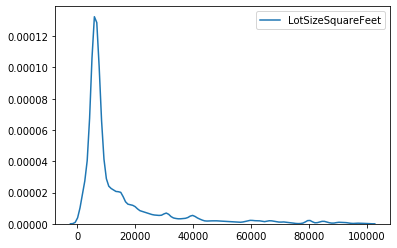

In [78]:
sns.kdeplot(master.LotSizeSquareFeet)

In [100]:
sns.pairplot(master[['ClosePrice', 
'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'
]])


# 'ClosePrice',

# 'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'

# 'YearBuilt','CloseDate','Age','CloseMonth','CloseYear','Bond10Year', 'WinterIsComing'

# 'Latitude', 'Longitude', 

# 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
# 'ParkingYN', 'PatioYN','CommonWalls','PoolPrivateYN',

# 'Single Family Residence', 'Condominium', 'Townhouse', 'Multi'
 

In [227]:
sorted(master.ClosePrice,reverse=True)

[19850000.0,
 19715787.0,
 19660000.0,
 19500000.0,
 19375000.0,
 19250000.0,
 19000000.0,
 18800000.0,
 18100000.0,
 18000000.0,
 18000000.0,
 18000000.0,
 17990000.0,
 17500000.0,
 17285000.0,
 17250000.0,
 17150000.0,
 17126000.0,
 17086000.0,
 17000000.0,
 16780000.0,
 16700000.0,
 16550000.0,
 16515000.0,
 16475000.0,
 16335000.0,
 16300000.0,
 16300000.0,
 16200000.0,
 16200000.0,
 16162500.0,
 16100000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 15940000.0,
 15800000.0,
 15750000.0,
 15750000.0,
 15700000.0,
 15600000.0,
 15550000.0,
 15500000.0,
 15500000.0,
 15500000.0,
 15450000.0,
 15300000.0,
 15275000.0,
 15210000.0,
 15025000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 14900000.0,
 14812500.0,
 14750000.0,
 14675000.0,
 14600000.0,
 14600000.0,
 14500000.0,
 14450000.0,
 14300000.0,
 14200000.0,
 14140000.0,
 14000000.0,
 14000000.0,
 13850000.0,
 13776750.0,
 13700000.0,
 13650000.0,
 13500000.0,
 13450000.0,
 13419063.0,
 13400000.0,
 13325000.0,

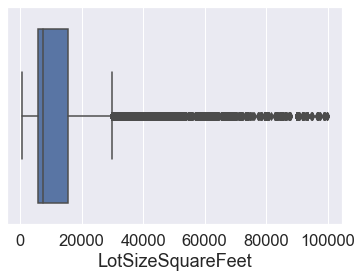

In [228]:
sns.boxplot(master['LotSizeSquareFeet'])

Check Distribution of price. Roughly between 1-2 Million Dollars.

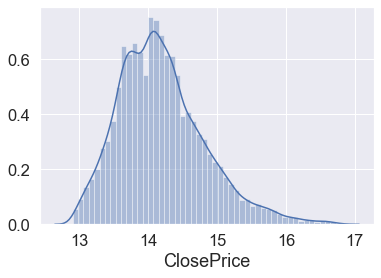

In [229]:
sns.distplot((np.log(master['ClosePrice'])))

## Compute the pairwise correlation

In [105]:
master.columns

Index(['addy', 'City', 'PostalCode', 'ClosePrice', 'CloseDate', 'CurrentPrice',
       'YearBuilt', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger',
       'LotSizeAcres', 'LotSizeSquareFeet', 'Latitude', 'Longitude',
       'StoriesTotal', 'PropertyType', 'PropertySubType', 'RoomType',
       'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
       'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'CommonWalls', 'ViewYN',
       'OriginalListPrice', 'OriginalListPrice'],
      dtype='object')

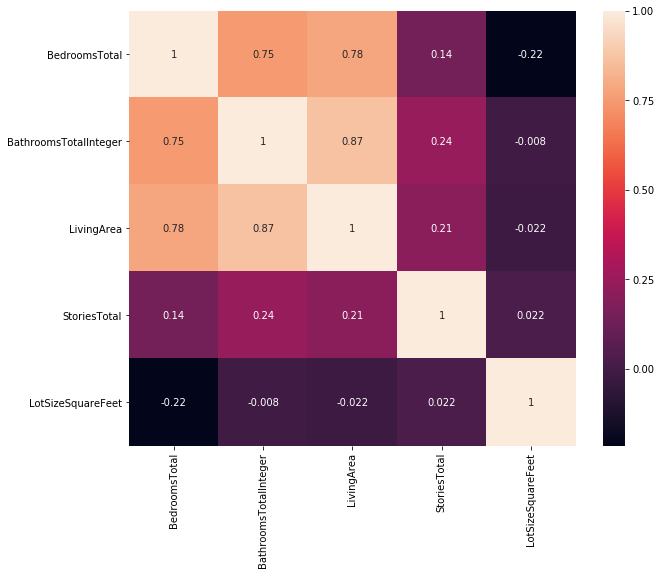

In [106]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'BedroomsTotal', 'BathroomsTotalInteger','LivingArea', 'StoriesTotal','LotSizeSquareFeet'
]].corr(),annot=True)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

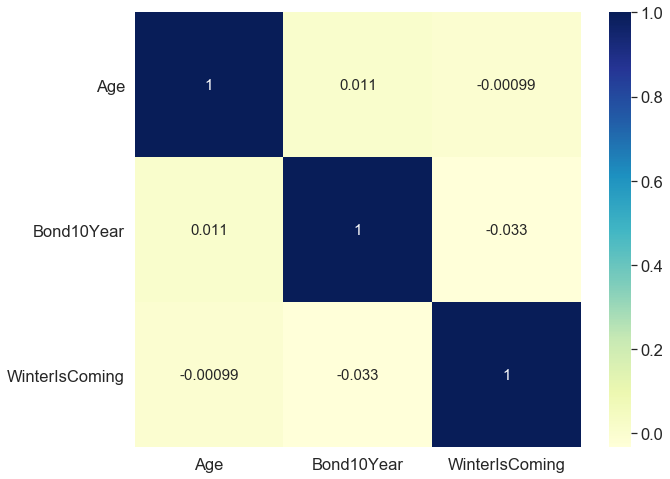

In [232]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'CloseDate','Age','Bond10Year','WinterIsComing'
]].corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 15})
sns.set(font_scale=1.5)
plt.xticks(rotation=0)
plt.yticks(rotation = 0)

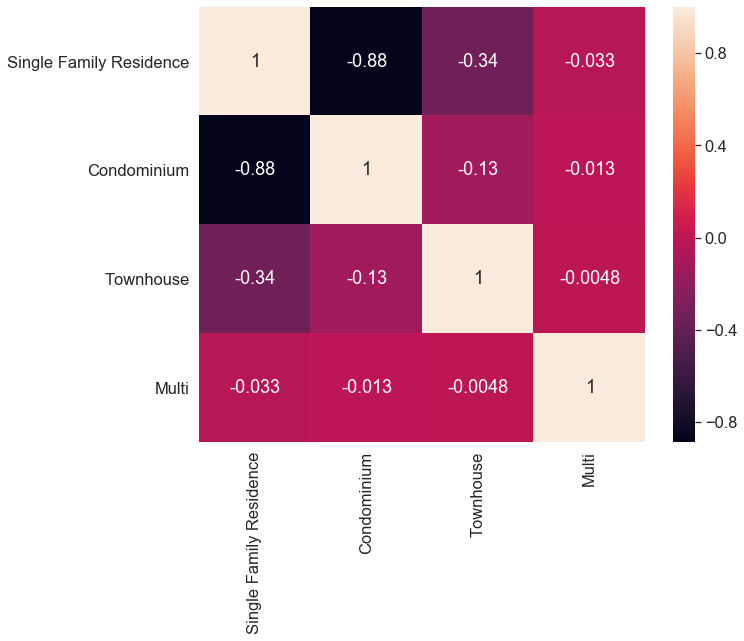

In [233]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(master[[
'Single Family Residence', 'Condominium', 'Townhouse', 'Multi'
]].corr(),annot=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

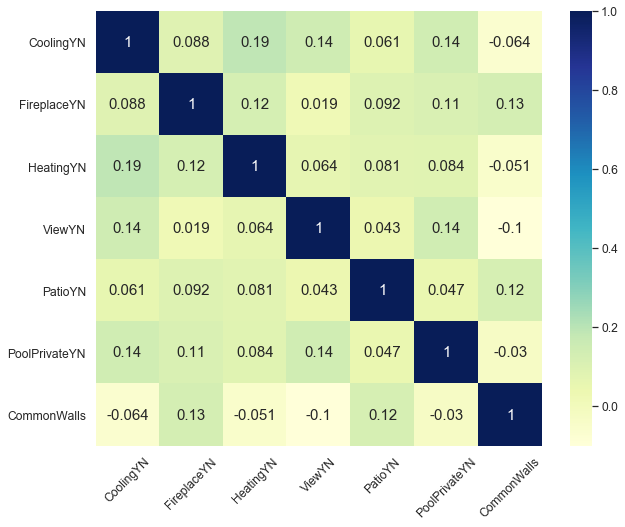

In [259]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.1)
sns.heatmap(master[['CoolingYN', 'FireplaceYN','HeatingYN','ViewYN',
                'PatioYN', 'PoolPrivateYN','CommonWalls']].corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 15})

plt.yticks(rotation = 0)
plt.xticks(rotation=45)

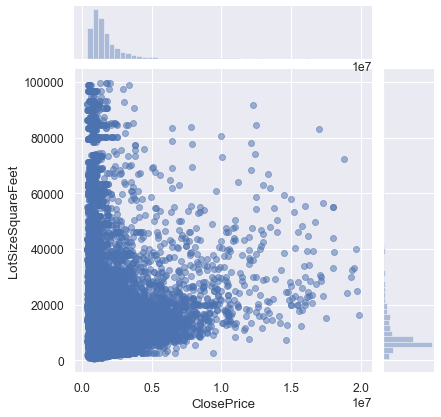

In [235]:
sns.jointplot(data=master, x='ClosePrice' , y = 'LotSizeSquareFeet', kind='scatter',alpha=.5)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


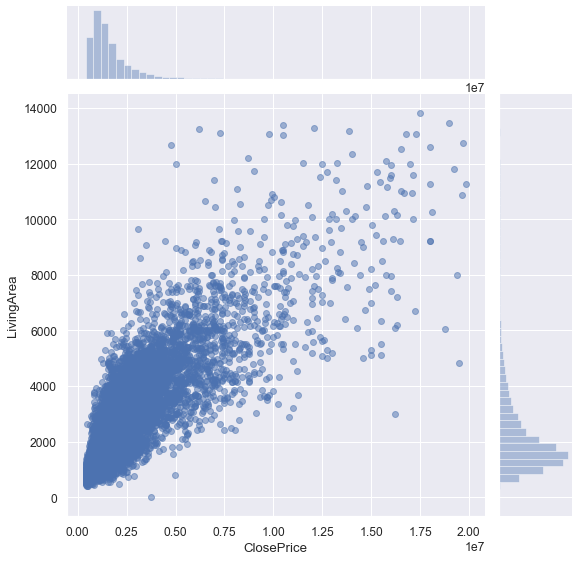

In [236]:
sns.jointplot(x=(master.ClosePrice) , y = master.LivingArea, kind='scatter',alpha=.5, size=8)

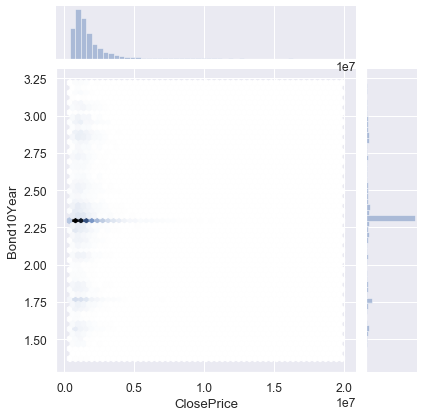

In [237]:
# Bond10Year
sns.jointplot(data=master, x='ClosePrice' , y = 'Bond10Year', kind='hex')

In [238]:
sns.lmplot(data=master, x='Age', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"]);

In [239]:
master.describe()

ClosePrice     YearBuilt    PostalCode  BedroomsTotal  \
count  2.170500e+04  21705.000000  21705.000000   21705.000000   
mean   1.844580e+06   1963.339691  90114.799816       3.020871   
std    1.711124e+06     30.374192    116.585110       1.167772   
min    4.010000e+05   1887.000000  90019.000000       1.000000   
25%    9.250000e+05   1940.000000  90039.000000       2.000000   
50%    1.350000e+06   1958.000000  90064.000000       3.000000   
75%    2.091050e+06   1988.000000  90210.000000       4.000000   
max    1.985000e+07   2019.000000  90405.000000       9.000000   

       BathroomsTotalInteger      Latitude     Longitude    LivingArea  \
count           21705.000000  21705.000000  21705.000000  21705.000000   
mean                2.912555     34.050314   -118.403035   2172.603548   
std                 1.492456      0.047026      0.065722   1380.109799   
min                 1.000000     33.929297   -118.574561      1.000000   
25%                 2.000000     34.014612   -118.447519   1310.000000   
50%                 3.000000     34.052383   -118.407885   1764.000000   
75%                 3.000000     34.089764   -118.365125   2603.000000   
max                15.000000     34.138444   -118.179776  13820.000000   

       StoriesTotal  LotSizeSquareFeet   CommonWalls  Single Family Residence  \
count  21705.000000       21705.000000  21705.000000             21705.000000   
mean       1.664686       14500.300290      0.582677                 0.697627   
std        0.873747       16574.254462      0.493129                 0.459296   
min        1.000000         697.000000      0.000000                 0.000000   
25%        1.000000        5838.000000      0.000000                 0.000000   
50%        1.000000        7492.000000      1.000000                 1.000000   
75%        2.000000       15401.000000      1.000000                 1.000000   
max        4.000000       99725.000000      1.000000                 1.000000   

        Condominium         Multi     Townhouse  AppliancesYN     CoolingYN  \
count  21705.000000  21705.000000  21705.000000  21705.000000  21705.000000   
mean       0.253398      0.000461      0.048514      0.839576      0.675973   
std        0.434967      0.021460      0.214855      0.367007      0.468021   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      1.000000   
75%        1.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        FireplaceYN     HeatingYN     LaundryYN     ParkingYN       PatioYN  \
count  21705.000000  21705.000000  21705.000000  21705.000000  21705.000000   
mean       0.762681      0.953513      0.927021      0.887584      0.380281   
std        0.425449      0.210542      0.260107      0.315885      0.485467   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      1.000000      0.000000   
50%        1.000000      1.000000      1.000000      1.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       PoolPrivateYN        ViewYN           Age    CloseMonth     CloseYear  \
count   21705.000000  21705.000000  21705.000000  21705.000000  21705.000000   
mean        0.234324      0.528311     56.660309      6.481226   2017.405390   
std         0.423585      0.499209     30.374192      3.090154      1.078259   
min         0.000000      0.000000      1.000000      1.000000   2016.000000   
25%         0.000000      0.000000     32.000000      4.000000   2016.000000   
50%         0.000000      1.000000     62.000000      6.000000   2017.000000   
75%         0.000000      1.00000

look for good linear fit, there is little error

/Users/esotewic/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


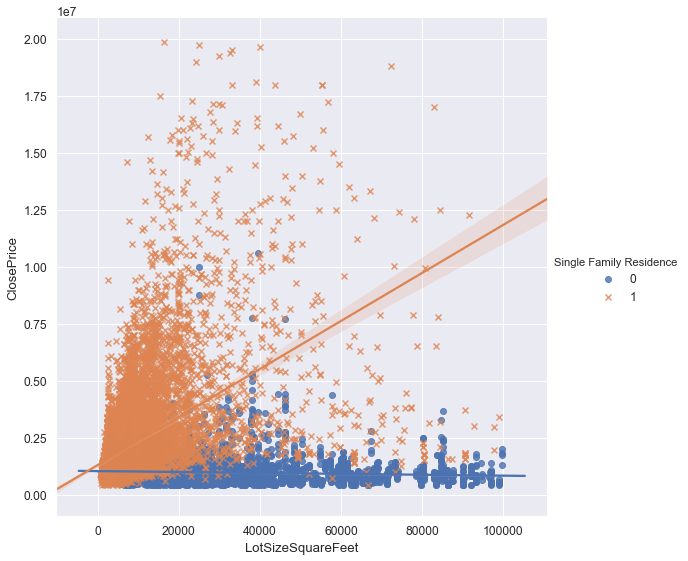

In [261]:


sns.lmplot(data=master, x='LotSizeSquareFeet', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"], size = 8);

In [241]:
master.LotSizeSquareFeet.describe()

count    21705.000000
mean     14500.300290
std      16574.254462
min        697.000000
25%       5838.000000
50%       7492.000000
75%      15401.000000
max      99725.000000
Name: LotSizeSquareFeet, dtype: float64

In [242]:
master['ClosePrice'].describe()

count    2.170500e+04
mean     1.844580e+06
std      1.711124e+06
min      4.010000e+05
25%      9.250000e+05
50%      1.350000e+06
75%      2.091050e+06
max      1.985000e+07
Name: ClosePrice, dtype: float64

In [243]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'PostalCode', 'PropertySubType',
       'BedroomsTotal', 'BathroomsTotalInteger', 'Latitude', 'Longitude',
       'LivingArea', 'StoriesTotal', 'LotSizeSquareFeet', 'CloseDate',
       'CommonWalls', 'Single Family Residence', 'Condominium', 'Multi',
       'Townhouse', 'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'LaundryYN', 'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'ViewYN', 'Age',
       'CloseMonth', 'CloseYear', 'WinterIsComing', 'BondDate', 'Bond10Year'],
      dtype='object')

# Modeling

In [592]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence


import textwrap # for wrapping answer descriptions
# from individual_soln import * # use functions from individual_soln.py

## Train Test Split

In [966]:
models = master

In [967]:
y = models['ClosePrice']
X = models[['OriginalListPrice',
            'Single Family Residence', 'Condominium','Townhouse','Multi',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude',
            'LotSizeSquareFeet','LivingArea','StoriesTotal'
            
            
            ,'Bond10Year','WinterIsComing','Age',
            
            'CoolingYN', 'FireplaceYN','HeatingYN','PatioYN',
            'PoolPrivateYN','CommonWalls','ViewYN'
           ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [968]:
X_train.head()

OriginalListPrice  OriginalListPrice  Single Family Residence  \
46255          1388000.0          1388000.0                        1   
33507          3750000.0          3750000.0                        1   
54861          1700000.0          1700000.0                        1   
23895          4225000.0          4225000.0                        1   
23782           995000.0           995000.0                        0   

       Condominium  Townhouse  Multi  BedroomsTotal  BathroomsTotalInteger  \
46255            0          0      0            3.0                    3.0   
33507            0          0      0            5.0                    5.0   
54861            0          0      0            2.0                    3.0   
23895            0          0      0            4.0                    5.0   
23782            1          0      0            2.0                    2.0   

        Latitude   Longitude  LotSizeSquareFeet  LivingArea  StoriesTotal  \
46255  34.054502 -118.357796             5501.0      1930.0           0.0   
33507  34.052103 -118.521177             7803.0      3757.0           2.0   
54861  34.095483 -118.393857             5993.0      1599.0           2.0   
23895  33.993123 -118.467728             5233.0      4500.0           2.0   
23782  33.984466 -118.469273             6639.0       979.0           1.0   

       Bond10Year  WinterIsComing   Age  CoolingYN  FireplaceYN  HeatingYN  \
46255    1.880000               0  90.0          1            1          1   
33507    1.470000               1  40.0          0            1          1   
54861    2.296689               1  94.0          1            1          1   
23895    1.795730               1   5.0          1            0          1   
23782    2.340000               0  47.0          0            1          1   

       PatioYN  PoolPrivateYN  CommonWalls  ViewYN  
46255        0              0            1       0  
33507        0              1            0       1  
54861        0              0            1       1  
23895        1              0            1       1  
23782        0              0            0       1

## Standard Scaler
+ select features
+ all features

In [969]:
scale_df = X[['Age','Latitude','Longitude','LotSizeSquareFeet','LivingArea']]
scaler = StandardScaler()
scaler.fit(scale_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [970]:

X_scaled = scaler.transform(scale_df)
df_scaled = pd.DataFrame(X_scaled, columns = scale_df.columns)
no_scale = X[['Single Family Residence', 'Condominium','Multi',
       'Townhouse','StoriesTotal', 'Bond10Year',
       'CoolingYN', 'FireplaceYN', 'HeatingYN', 'PatioYN', 'PoolPrivateYN',
        'WinterIsComing','ViewYN',
       'CommonWalls']]

In [971]:
no_scale.reset_index(drop=True,inplace=True)

In [972]:
X = df_scaled.join(no_scale,how='outer')


In [973]:

y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


### All Features

In [172]:
# scale_df = X
# scaler = StandardScaler()
# scaler.fit(scale_df)
# X_scaled = scaler.transform(scale_df)
# df_scaled = pd.DataFrame(X_scaled, columns = scale_df.columns)
# y = np.log(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


## OLS

In [593]:
import statsmodels.api as sm

In [594]:
model = sm.OLS(list(y_train),X_train)
results = model.fit()

In [595]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     3526.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:14:49   Log-Likelihood:                -2101.8
No. Observations:               15193   AIC:                             4242.
Df Residuals:                   15174   BIC:                             4386.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0110      0.003      3.657      0.000       0.005       0.017
Latitude                    0.0478      0.003     16.982      0.000       0.042       0.053
Longitude                  -0.1707      0.003    -61.720      0.000      -0.176      -0.165
LotSizeSquareFeet          -0.0114      0.003     -4.007      0.000      -0.017      -0.006
LivingArea                  0.3877      0.003    121.229      0.000       0.381       0.394
Single Family Residence    13.9252      0.018    773.168      0.000      13.890      13.961
Condominium                13.4967      0.018    749.795      0.000      13.461      13.532
Multi                      13.4500      0.115    117.251      0.000      13.225      13.675
Townhouse                  13.5992      0.020    669.774      0.000      13.559      13.639
StoriesTotal               -0.0027      0.002     -1.200      0.230      -0.007       0.002
Bond10Year                  0.0684      0.005     13.173      0.000       0.058       0.079
CoolingYN                   0.0560      0.005     10.706      0.000       0.046       0.066
FireplaceYN                 0.0578      0.006     10.145      0.000       0.047       0.069
HeatingYN                   0.1111      0.011      9.998      0.000       0.089       0.133
PatioYN                     0.0338      0.005      7.054      0.000       0.024       0.043
PoolPrivateYN               0.0754      0.006     12.212      0.000       0.063       0.088
WinterIsComing             -0.0157      0.005     -3.409      0.001      -0.025      -0.007
ViewYN                      0.0379      0.005      7.823      0.000       0.028       0.047
CommonWalls                 0.0080      0.007      1.173      0.241      -0.005       0.021
==============================================================================
Omnibus:                     1198.647   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3911.341
Skew:                           0.387   Prob(JB):                         0.00
Kurtosis:                       5.362   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [596]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.intercept_)
print(metrics.explained_variance_score(y_test,predictions)) #R2 score
df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) #Coefficients DF

13.617767471165152
0.8033788239053266


In [597]:
df.sort_values('Coeff',ascending=False).head(10)

Coeff
LivingArea               0.387715
Single Family Residence  0.307435
HeatingYN                0.111128
PoolPrivateYN            0.075424
Bond10Year               0.068412
FireplaceYN              0.057816
CoolingYN                0.055971
Latitude                 0.047786
ViewYN                   0.037945
PatioYN                  0.033815

In [598]:
pd.Series(lm.coef_).sort_values()

2    -0.170678
7    -0.167808
6    -0.121081
8    -0.018547
16   -0.015688
3    -0.011352
9    -0.002717
18    0.008019
0     0.010971
14    0.033815
17    0.037945
1     0.047786
11    0.055971
12    0.057816
10    0.068412
15    0.075424
13    0.111128
5     0.307435
4     0.387715
dtype: float64

### Loss Functions

In [599]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

0.20924747485732542
0.07887150232020262
0.28084070630911506


### Predictions

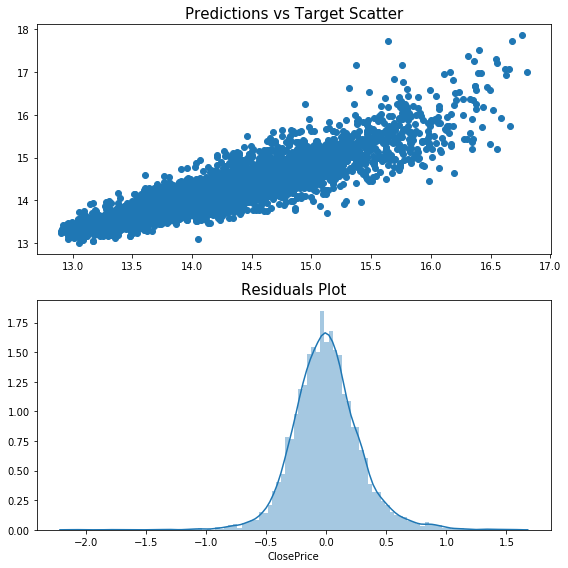

In [180]:
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].scatter(y_test,predictions)
axs[0].set_title('Predictions vs Target Scatter', size=15)
axs[1]=sns.distplot(y_test-predictions, bins = 100)
axs[1].set_title('Residuals Plot', size=15)
plt.tight_layout()

Normally Distributed Residuals means model was a correct choice


In [328]:
X_train.Age[:7867].shape

(7867,)

In [329]:
(y_test-predictions).shape

(6512,)

In [330]:
X_train.columns

Index(['Age', 'Latitude', 'Longitude', 'LotSizeSquareFeet', 'LivingArea',
       'Single Family Residence', 'Condominium', 'Multi', 'Townhouse',
       'StoriesTotal', 'Bond10Year', 'CoolingYN', 'FireplaceYN', 'HeatingYN',
       'PatioYN', 'PoolPrivateYN', 'WinterIsComing', 'ViewYN', 'CommonWalls'],
      dtype='object')

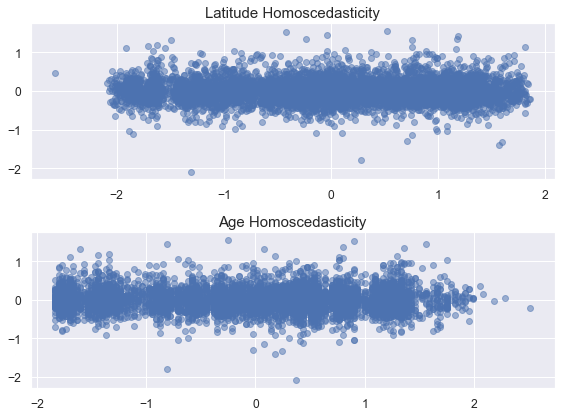

In [338]:
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].scatter(X_train.Latitude[:len(y_test-predictions)],y_test-predictions,alpha=.5)
axs[0].set_title('Latitude Homoscedasticity', size=15)
axs[1].scatter(X_train.Age[:len(y_test-predictions)],y_test-predictions,alpha=.5)
axs[1].set_title('Age Homoscedasticity', size=15)
plt.tight_layout()

The assumptions are linearity, linear independence, homoscedasticity, and normal distribution of errors. 
Not all of these are needed, only linearity but it may make a difference when they are violated. 

# Ridge Regression & Lasso

In [181]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [182]:
ridge_r = Ridge(alpha=0.1)
ridge_r.fit(X_train, y_train)
ridge_pred = ridge_r.predict(X_test)
print(ridge_r.score(X_test,y_test))
print(mean_squared_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

0.8033769730454478
0.07886988505111302
0.2808378269591065


In [183]:
# lasso = Lasso()
# lasso.fit(X_train,y_train)
# lasso_pred = lasso.predict(X_test)
# lasso.score(y_test,lasso_pred)

In [988]:
y = models['ClosePrice']

X = models[[
            'Single Family Residence', 'Condominium','Townhouse','Multi',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude',
            'LotSizeSquareFeet','LivingArea','StoriesTotal'
            
            
            ,'Bond10Year','WinterIsComing','Age',
            
            'CoolingYN', 'FireplaceYN','HeatingYN','PatioYN',
            'PoolPrivateYN','CommonWalls','ViewYN'
]]

# X = models[['PostalCode', 'BedroomsTotal',
#        'BathroomsTotalInteger', 'Latitude', 'Longitude', 'LivingArea',
#        'StoriesTotal', 'LotSizeSquareFeet', 'CommonWalls',
#        'Single Family Residence', 'Condominium', 'Multi', 'Townhouse',
#        'AppliancesYN', 'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN',
#        'ParkingYN', 'PatioYN', 'PoolPrivateYN', 'Age', 'CloseMonth',
#        'CloseYear', 'WinterIsComing', 'Bond10Year'
#            ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# Random Forest Regressor Model

In [989]:
rfr = RandomForestRegressor(n_estimators=100, max_features=3, bootstrap=True, max_depth= 110,
                           min_samples_leaf=3,min_samples_split=8)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)

print(rfr.score(X_test,y_test)) 
print(rfr.feature_importances_) #Feature Importances
print(r2_score(y_test,rfr_predictions))

0.8331452186000274
[3.86540848e-02 1.68967968e-02 1.67481631e-03 5.57800606e-06
 1.23691150e-01 2.01044171e-01 4.01303860e-02 7.01630266e-02
 7.93133891e-02 2.87802846e-01 1.20133105e-02 1.37587259e-02
 2.55174750e-03 3.21023181e-02 4.13118797e-03 8.58295358e-03
 6.84815828e-04 3.84776239e-03 4.94777670e-02 9.49643925e-03
 3.97672734e-03]
0.8331452186000274


TypeError: 'AxesSubplot' object is not subscriptable

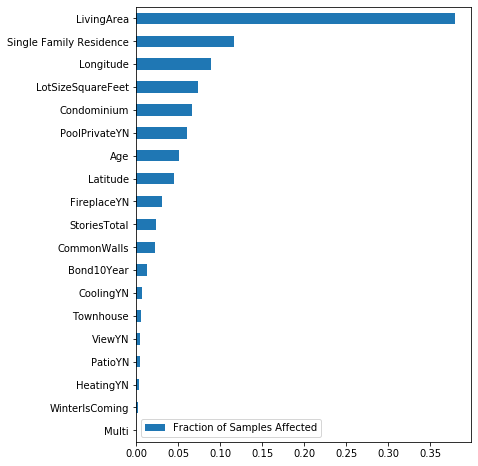

In [601]:

feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfr.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')

feat_scores.plot(kind='barh', figsize =(6,8))

## Grid Search

In [358]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}

In [359]:
rf = RandomForestRegressor()

In [360]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [361]:
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [1586]:
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [1897]:
print('Best Params:')
print(grid_search.best_params_)
print('Best CV Score:')
print(grid_search.best_score_)

Best Params:
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best CV Score:
0.8031087388339937


In [1898]:
grid_search_predict = grid_search.predict(X_test)
print(r2_score(y_test, grid_search_predict))

0.793239760532856


# Gradient Boosting

In [602]:
GBR = GradientBoostingRegressor(learning_rate=0.05, 
                                n_estimators=2000,
                                max_features=15,
                                max_depth=5,
                                subsample=1)

GBR.fit(X_train, y_train)
GBR_predict = GBR.predict(X_test)

print(r2_score(y_test, GBR_predict))
print(GBR.score(X_test,y_test))

0.9262602738571126
0.9262602738571127


In [603]:
GBR.feature_importances_

array([2.20421276e-02, 4.65927286e-02, 8.96324580e-02, 2.83793788e-02,
       7.13661518e-01, 6.53181059e-02, 7.57671878e-03, 6.09049553e-05,
       3.90547167e-04, 1.74375018e-03, 7.31238583e-03, 1.74764266e-03,
       4.61163724e-04, 1.40101230e-03, 6.52122106e-04, 1.08663815e-02,
       7.11540483e-04, 9.13046878e-04, 5.36466583e-04])

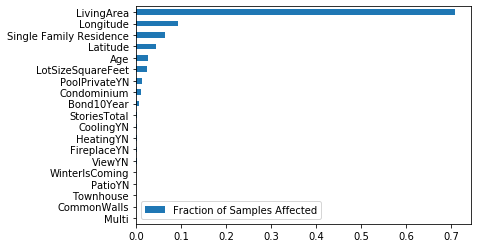

In [585]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : GBR.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [633]:
GBR.

<bound method RegressorMixin.score of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=15, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [620]:
np.exp(GBR_predict[0])

1464205.860723398

In [631]:
MLS.iloc[46255]

ClosePrice                                                         1.434e+06
ParcelNumber                                                     5.08502e+09
LotSizeAcres                                                           0.126
PrivateRemarks             Seller to select all services. Private showing...
OriginalListPrice                                                  1.388e+06
PublicRemarks              Offering an unparalleled lifestyle in the buzz...
Appliances                                Dishwasher, Disposal, Refrigerator
AppliancesYN                                                            True
MLSAreaMajor                               C19 - Beverly Center-Miracle Mile
AssociationAmenities                                                     NaN
AssociationFee                                                           NaN
BathroomsTotalInteger                                                      3
BathroomsFull                                                              2

In [628]:
np.exp(y_train[:1])

46255    1434000.0
Name: ClosePrice, dtype: float64

In [607]:
np.exp(GBR_predict[:10])

array([1464205.8607234 ,  834868.08537292, 3281227.85065338,
        836970.76786217, 6006913.35402633, 1210321.30052157,
       1734163.75765778, 2110024.67522563, 2929679.80661578,
        884346.9077648 ])

## Grid Search

In [1795]:
param_grid = {
'n_estimators': [2000],
'max_features': [15],
'max_depth': [5],
'learning_rate': [.05],
'subsample': [1]
}
classifier = GridSearchCV(estimator=GBR, cv=10, param_grid=param_grid, n_jobs=1)


In [1796]:
classifier.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.05,
                                                 loss='ls', max_depth=5,
                                                 max_features=15,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000,
                                                 n_iter_no_change=None,
               

In [1797]:
print('Best Params:')
print(classifier.best_params_)
print('Best CV Score:')
print(classifier.best_score_)

Best Params:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 15, 'n_estimators': 2000, 'subsample': 1}
Best CV Score:
0.8669756949824985


In [1798]:
classifier_predict = classifier.predict(X_test)
print(r2_score(y_test, classifier_predict))

0.850668490405543


In [1322]:
classifier.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.15,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000,
                                                 n_iter_no_change=None,
             

In [1329]:
print('Best Params:')
print(classifier.best_params_)
print('Best CV Score:')
print(classifier.best_score_)

Best Params:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 15, 'n_estimators': 2000, 'subsample': 1}
Best CV Score:
0.9268982371752508


# XGBOOST

In [586]:
import xgboost as xgb

In [587]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [588]:
model.fit(X_train,y_train)
predict=model.predict(X_test)

model.score(X_test,y_test)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9237751510928361

In [365]:
from sklearn.datasets import fetch_california_housing

In [366]:
cal=fetch_california_housing()


In [367]:
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

## Tensor Flow

In [990]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorboard.plugins.hparams import api as hp


In [944]:
master

ClosePrice  YearBuilt  OriginalListPrice  OriginalListPrice  \
1       1890000.0     1941.0          1800000.0          1800000.0   
2        720000.0     1964.0           775000.0           775000.0   
3       1550000.0     1936.0          1695000.0          1695000.0   
4        525000.0     1950.0           499000.0           499000.0   
5       1211000.0     1967.0           995000.0           995000.0   
6       1710000.0     1927.0          1650000.0          1650000.0   
7        790000.0     1963.0                NaN                NaN   
8       1850000.0     1940.0          1795000.0          1795000.0   
9       1350000.0     1980.0          1250000.0          1250000.0   
10      1950000.0     1948.0          2200000.0          2200000.0   
11      1950000.0     1909.0          1950000.0          1950000.0   
12       975000.0     1921.0          1925000.0          1925000.0   
13      2000000.0     1940.0          2000000.0          2000000.0   
14      1050000.0     1990.0          1230000.0          1230000.0   
15      1537500.0     2008.0          1649000.0          1649000.0   
16      3085500.0     2017.0          3349000.0          3349000.0   
18      1835000.0     1938.0          1849000.0          1849000.0   
19      1275000.0     1974.0          1250000.0          1250000.0   
20      1520000.0     1910.0          1500000.0          1500000.0   
23       896000.0     1977.0           849000.0           849000.0   
24      3150000.0     2017.0          3295000.0          3295000.0   
25      1814105.0     1956.0          1695000.0          1695000.0   
26      3200000.0     2017.0          3495000.0          3495000.0   
27      1020000.0     1911.0           995000.0           995000.0   
28      4325000.0     2017.0          4500000.0          4500000.0   
29      1970000.0     2011.0          1995000.0          1995000.0   
30       541000.0     1953.0           499500.0           499500.0   
32       800000.0     1973.0           815000.0           815000.0   
33       660000.0     1971.0           639000.0           639000.0   
34      1647000.0     1929.0          1729000.0          1729000.0   
...           ...        ...                ...                ...   
56162    905000.0     1964.0           950000.0           950000.0   
56163   2900000.0     1989.0          2999000.0          2999000.0   
56164    597000.0     1965.0           585000.0           585000.0   
56165   2675000.0     1958.0          2999000.0          2999000.0   
56166   5200000.0     1969.0          5199000.0          5199000.0   
56168   1070000.0     2006.0          1249000.0          1249000.0   
56169    777000.0     1967.0           810000.0           810000.0   
56170    600000.0     1974.0           589000.0           589000.0   
56171  10000000.0     2007.0         11999000.0         11999000.0   
56172    605000.0     1969.0           599000.0           599000.0   
56173  15750000.0     1962.0         22995000.0         22995000.0   
56176   2675000.0     1989.0          3148000.0          3148000.0   
56177    785000.0     1974.0           769000.0           769000.0   
56180    528000.0     1969.0           569000.0           569000.0   
56181   1175000.0     1961.0           999000.0           999000.0   
56182    985000.0     1981.0           999000.0           999000.0   
56183    803000.0     1969.0           788000.0           788000.0   
56184    949888.0     1981.0           899000.0           899000.0   
56185   1300000.0     1924.0          1100000.0          1100000.0   
56186    800000.0     1973.0           799000.0           799000.0   
56188   1120000.0     2003.0          1145000.0          1145000.0   
56189    989000.0     1975.0           979000.0           979000.0   
56190    750000.0     1970.0           699000.0           699000.0   
56191    850000.0     1979.0           850000.0           850000.0   
56192    790000.0     1959.0           749000.0           749000.0   
56193    520000.0

In [945]:
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [946]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model


In [947]:
from mpl_toolkits.mplot3d import Axes3D

In [956]:
models = master

y = models['ClosePrice']
X = models[[
            'Single Family Residence', 'Condominium','Townhouse','Multi',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude',
            'LotSizeSquareFeet','LivingArea','StoriesTotal'
            
            
            ,'Bond10Year','WinterIsComing','Age',
            
            'CoolingYN', 'FireplaceYN','HeatingYN','PatioYN',
            'PoolPrivateYN','CommonWalls','ViewYN'
           ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [991]:
X_train.shape

(15193, 21)

In [974]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=1, input_dim=X_train.shape[1]))

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))


model.compile(loss='mean_squared_error',
              optimizer='adam')

In [975]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 1)                 20        
_________________________________________________________________
dense_155 (Dense)            (None, 50)                100       
_________________________________________________________________
dense_156 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_157 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 51        
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________


In [976]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
15193/15193 [==============================] - 1s 38us/step - loss: 16.2987
Epoch 2/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.4106
Epoch 3/20
15193/15193 [==============================] - 0s 25us/step - loss: 0.3969
Epoch 4/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.3874
Epoch 5/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.3670
Epoch 6/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.2985
Epoch 7/20
15193/15193 [==============================] - 0s 27us/step - loss: 0.2377
Epoch 8/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.1849
Epoch 9/20
15193/15193 [==============================] - 0s 26us/step - loss: 0.1518
Epoch 10/20
15193/15193 [==============================] - 0s 28us/step - loss: 0.1271
Epoch 11/20
15193/15193 [==============================] - 0s 27us/step - loss: 0.1159
Epoch 12/20
15193/15193 [==========================

In [977]:
model.layers[0].get_weights()

[array([[-0.01633786],
        [-0.08417205],
        [ 0.27215344],
        [ 0.00426508],
        [-0.8084004 ],
        [-0.42124456],
        [ 0.26106444],
        [ 0.01006656],
        [ 0.1576477 ],
        [ 0.00487826],
        [-0.07623499],
        [-0.05032066],
        [-0.02084378],
        [-0.3788157 ],
        [-0.02443426],
        [-0.0865522 ],
        [ 0.0207167 ],
        [-0.05020715],
        [ 0.0541996 ]], dtype=float32), array([-0.03543697], dtype=float32)]

In [978]:
predictions = model.predict_on_batch(X_test)

def my_r2_score(v_true, v_pred):
    ssres = np.sum(np.square(v_true - v_pred))
    sstot = np.sum(np.square(v_true - np.mean(v_true)))
    return 1 - ssres / sstot

my_r2_score(np.array(y_test).reshape(6512,1), predictions)

0.8057243188031423

In [1003]:
score = model.evaluate(X_test, y_test, verbose=0)


ValueError: Error when checking input: expected dense_154_input to have shape (19,) but got array with shape (21,)

In [985]:
score

0.07792831168347553

## GridSearch

In [639]:
master

ClosePrice  YearBuilt  OriginalListPrice  OriginalListPrice  \
1       1890000.0     1941.0          1800000.0          1800000.0   
2        720000.0     1964.0           775000.0           775000.0   
3       1550000.0     1936.0          1695000.0          1695000.0   
4        525000.0     1950.0           499000.0           499000.0   
5       1211000.0     1967.0           995000.0           995000.0   
6       1710000.0     1927.0          1650000.0          1650000.0   
7        790000.0     1963.0                NaN                NaN   
8       1850000.0     1940.0          1795000.0          1795000.0   
9       1350000.0     1980.0          1250000.0          1250000.0   
10      1950000.0     1948.0          2200000.0          2200000.0   
11      1950000.0     1909.0          1950000.0          1950000.0   
12       975000.0     1921.0          1925000.0          1925000.0   
13      2000000.0     1940.0          2000000.0          2000000.0   
14      1050000.0     1990.0          1230000.0          1230000.0   
15      1537500.0     2008.0          1649000.0          1649000.0   
16      3085500.0     2017.0          3349000.0          3349000.0   
18      1835000.0     1938.0          1849000.0          1849000.0   
19      1275000.0     1974.0          1250000.0          1250000.0   
20      1520000.0     1910.0          1500000.0          1500000.0   
23       896000.0     1977.0           849000.0           849000.0   
24      3150000.0     2017.0          3295000.0          3295000.0   
25      1814105.0     1956.0          1695000.0          1695000.0   
26      3200000.0     2017.0          3495000.0          3495000.0   
27      1020000.0     1911.0           995000.0           995000.0   
28      4325000.0     2017.0          4500000.0          4500000.0   
29      1970000.0     2011.0          1995000.0          1995000.0   
30       541000.0     1953.0           499500.0           499500.0   
32       800000.0     1973.0           815000.0           815000.0   
33       660000.0     1971.0           639000.0           639000.0   
34      1647000.0     1929.0          1729000.0          1729000.0   
...           ...        ...                ...                ...   
56162    905000.0     1964.0           950000.0           950000.0   
56163   2900000.0     1989.0          2999000.0          2999000.0   
56164    597000.0     1965.0           585000.0           585000.0   
56165   2675000.0     1958.0          2999000.0          2999000.0   
56166   5200000.0     1969.0          5199000.0          5199000.0   
56168   1070000.0     2006.0          1249000.0          1249000.0   
56169    777000.0     1967.0           810000.0           810000.0   
56170    600000.0     1974.0           589000.0           589000.0   
56171  10000000.0     2007.0         11999000.0         11999000.0   
56172    605000.0     1969.0           599000.0           599000.0   
56173  15750000.0     1962.0         22995000.0         22995000.0   
56176   2675000.0     1989.0          3148000.0          3148000.0   
56177    785000.0     1974.0           769000.0           769000.0   
56180    528000.0     1969.0           569000.0           569000.0   
56181   1175000.0     1961.0           999000.0           999000.0   
56182    985000.0     1981.0           999000.0           999000.0   
56183    803000.0     1969.0           788000.0           788000.0   
56184    949888.0     1981.0           899000.0           899000.0   
56185   1300000.0     1924.0          1100000.0          1100000.0   
56186    800000.0     1973.0           799000.0           799000.0   
56188   1120000.0     2003.0          1145000.0          1145000.0   
56189    989000.0     1975.0           979000.0           979000.0   
56190    750000.0     1970.0           699000.0           699000.0   
56191    850000.0     1979.0           850000.0           850000.0   
56192    790000.0     1959.0           749000.0           749000.0   
56193    520000.0

In [835]:
ts = master[['CloseDate','ClosePrice']]

In [836]:
copyts=ts.copy()
copyts.CloseDate = pd.to_datetime(copyts.CloseDate).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [837]:
copyts.head()

CloseDate  ClosePrice
1    2018-1   1890000.0
2    2018-4    720000.0
3    2018-2   1550000.0
4    2018-1    525000.0
5    2018-1   1211000.0

In [838]:
copyts.groupby('CloseDate').mean().sort_values('CloseDate')
copyts

CloseDate  ClosePrice
1        2018-1   1890000.0
2        2018-4    720000.0
3        2018-2   1550000.0
4        2018-1    525000.0
5        2018-1   1211000.0
6       2017-11   1710000.0
7       2017-11    790000.0
8       2017-12   1850000.0
9       2017-12   1350000.0
10       2018-2   1950000.0
11      2017-12   1950000.0
12       2018-2    975000.0
13       2018-1   2000000.0
14       2018-5   1050000.0
15       2018-3   1537500.0
16       2018-2   3085500.0
18       2018-5   1835000.0
19       2018-1   1275000.0
20      2017-12   1520000.0
23      2017-12    896000.0
24      2017-12   3150000.0
25      2017-11   1814105.0
26       2018-3   3200000.0
27      2017-11   1020000.0
28      2017-12   4325000.0
29      2017-11   1970000.0
30      2017-11    541000.0
32      2017-11    800000.0
33      2017-11    660000.0
34      2017-11   1647000.0
...         ...         ...
56162   2018-11    905000.0
56163    2019-6   2900000.0
56164   2018-10    597000.0
56165    2019-1   2675000.0
56166    2018-8   5200000.0
56168   2018-11   1070000.0
56169   2018-10    777000.0
56170    2018-9    600000.0
56171    2019-1  10000000.0
56172   2018-10    605000.0
56173    2019-4  15750000.0
56176   2018-12   2675000.0
56177    2018-9    785000.0
56180   2018-10    528000.0
56181    2018-9   1175000.0
56182    2018-9    985000.0
56183    2018-9    803000.0
56184    2018-9    949888.0
56185    2018-8   1300000.0
56186    2018-7    800000.0
56188    2018-8   1120000.0
56189    2018-8    989000.0
56190    2018-9    750000.0
56191    2018-9    850000.0
56192    2018-8    790000.0
56193    2018-9    520000.0
56194    2018-8   1285000.0
56197   2018-10    879000.0
56198   2018-11   3300000.0
56200    2018-9    668000.0

[21705 rows x 2 columns]

In [816]:
fig,ax=plt.subplots(figsize=(12,12))
sns.lineplot(x='CloseDate',y='ClosePrice',data=copyts)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [817]:
from fbprophet import Prophet

In [839]:
ts.head()

CloseDate  ClosePrice
1  01/24/2018 12:00:00 AM   1890000.0
2  04/10/2018 12:00:00 AM    720000.0
3  02/21/2018 12:00:00 AM   1550000.0
4  01/11/2018 12:00:00 AM    525000.0
5  01/24/2018 12:00:00 AM   1211000.0

In [840]:
ts.CloseDate=pd.to_datetime(ts['CloseDate'])

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dtype: int64


In [841]:
ts = ts.groupby('CloseDate').mean().sort_values('CloseDate')

In [842]:
ts.head()

ClosePrice
CloseDate               
2016-01-01  3.230000e+06
2016-01-02  1.067500e+06
2016-01-04  1.211300e+06
2016-01-05  2.340862e+06
2016-01-06  1.992348e+06

In [843]:
tempts = ts.copy()


In [844]:
tempts.plot()

In [845]:
ts.head()

ClosePrice
CloseDate               
2016-01-01  3.230000e+06
2016-01-02  1.067500e+06
2016-01-04  1.211300e+06
2016-01-05  2.340862e+06
2016-01-06  1.992348e+06

In [846]:
tempts.head()

ClosePrice
CloseDate               
2016-01-01  3.230000e+06
2016-01-02  1.067500e+06
2016-01-04  1.211300e+06
2016-01-05  2.340862e+06
2016-01-06  1.992348e+06

In [848]:
ts = tempts

In [849]:
ts.reset_index(inplace=True)

In [850]:
ts

CloseDate    ClosePrice
0    2016-01-01  3.230000e+06
1    2016-01-02  1.067500e+06
2    2016-01-04  1.211300e+06
3    2016-01-05  2.340862e+06
4    2016-01-06  1.992348e+06
5    2016-01-07  1.179522e+06
6    2016-01-08  1.754534e+06
7    2016-01-11  1.663192e+06
8    2016-01-12  1.783721e+06
9    2016-01-13  2.420567e+06
10   2016-01-14  1.467056e+06
11   2016-01-15  1.336426e+06
12   2016-01-16  6.736667e+05
13   2016-01-19  1.577000e+06
14   2016-01-20  1.267899e+06
15   2016-01-21  2.037464e+06
16   2016-01-22  1.660002e+06
17   2016-01-24  4.370000e+05
18   2016-01-25  1.362751e+06
19   2016-01-26  1.119669e+06
20   2016-01-27  1.337416e+06
21   2016-01-28  2.038028e+06
22   2016-01-29  1.967767e+06
23   2016-01-30  7.825000e+05
24   2016-02-01  2.085720e+06
25   2016-02-02  2.405200e+06
26   2016-02-03  1.118682e+06
27   2016-02-04  1.164812e+06
28   2016-02-05  1.427229e+06
29   2016-02-08  1.047444e+06
...         ...           ...
1060 2019-09-09  1.760567e+06
1061 2019-09-10  1.725325e+06
1062 2019-09-11  1.456393e+06
1063 2019-09-12  1.738740e+06
1064 2019-09-13  2.027101e+06
1065 2019-09-16  1.436548e+06
1066 2019-09-17  2.507509e+06
1067 2019-09-18  2.508148e+06
1068 2019-09-19  1.598750e+06
1069 2019-09-20  1.699453e+06
1070 2019-09-23  1.722802e+06
1071 2019-09-24  3.221338e+06
1072 2019-09-25  2.716816e+06
1073 2019-09-26  1.592654e+06
1074 2019-09-27  1.839502e+06
1075 2019-09-30  1.676090e+06
1076 2019-10-01  1.783242e+06
1077 2019-10-02  1.838343e+06
1078 2019-10-03  1.788933e+06
1079 2019-10-04  1.430561e+06
1080 2019-10-06  1.365000e+06
1081 2019-10-07  1.672941e+06
1082 2019-10-08  1.964207e+06
1083 2019-10-09  1.941473e+06
1084 2019-10-10  1.748441e+06
1085 2019-10-11  2.418502e+06
1086 2019-10-12  4.500000e+06
1087 2019-10-13  3.875000e+06
1088 2019-10-15  2.193461e+06
1089 2019-10-16  2.193696e+06

[1090 rows x 2 columns]

In [856]:
ts.rename(columns={'CloseDate':'ds','ClosePrice':'y'},inplace=True)

In [860]:
ts['CloseMonth'] = pd.to_datetime(ts.ds).apply(lambda x: x.year)

In [861]:
test = ts[ts.CloseMonth==2019]
train = ts[ts.CloseMonth!=2019]

In [862]:
test=test.drop('CloseMonth',axis=1)
train=train.drop('CloseMonth',axis=1)

In [863]:
test.head()

ds             y
857 2019-01-01  2.400000e+06
858 2019-01-02  3.146364e+06
859 2019-01-03  2.647804e+06
860 2019-01-04  1.699000e+06
861 2019-01-07  1.411000e+06

In [864]:
train

ds             y
0   2016-01-01  3.230000e+06
1   2016-01-02  1.067500e+06
2   2016-01-04  1.211300e+06
3   2016-01-05  2.340862e+06
4   2016-01-06  1.992348e+06
5   2016-01-07  1.179522e+06
6   2016-01-08  1.754534e+06
7   2016-01-11  1.663192e+06
8   2016-01-12  1.783721e+06
9   2016-01-13  2.420567e+06
10  2016-01-14  1.467056e+06
11  2016-01-15  1.336426e+06
12  2016-01-16  6.736667e+05
13  2016-01-19  1.577000e+06
14  2016-01-20  1.267899e+06
15  2016-01-21  2.037464e+06
16  2016-01-22  1.660002e+06
17  2016-01-24  4.370000e+05
18  2016-01-25  1.362751e+06
19  2016-01-26  1.119669e+06
20  2016-01-27  1.337416e+06
21  2016-01-28  2.038028e+06
22  2016-01-29  1.967767e+06
23  2016-01-30  7.825000e+05
24  2016-02-01  2.085720e+06
25  2016-02-02  2.405200e+06
26  2016-02-03  1.118682e+06
27  2016-02-04  1.164812e+06
28  2016-02-05  1.427229e+06
29  2016-02-08  1.047444e+06
..         ...           ...
827 2018-11-21  2.431260e+06
828 2018-11-22  7.625000e+06
829 2018-11-23  2.175000e+06
830 2018-11-26  1.243667e+06
831 2018-11-27  1.654186e+06
832 2018-11-28  2.243036e+06
833 2018-11-29  2.115679e+06
834 2018-11-30  1.980382e+06
835 2018-12-03  1.433780e+06
836 2018-12-04  2.016450e+06
837 2018-12-05  1.316667e+06
838 2018-12-06  1.417960e+06
839 2018-12-07  2.136313e+06
840 2018-12-10  1.454844e+06
841 2018-12-11  1.818964e+06
842 2018-12-12  2.749632e+06
843 2018-12-13  1.469900e+06
844 2018-12-14  1.874494e+06
845 2018-12-15  9.990000e+05
846 2018-12-16  1.500000e+06
847 2018-12-17  1.977821e+06
848 2018-12-18  1.603186e+06
849 2018-12-19  1.397178e+06
850 2018-12-20  1.330000e+06
851 2018-12-21  1.538211e+06
852 2018-12-24  1.854500e+06
853 2018-12-26  1.702520e+06
854 2018-12-27  1.738202e+06
855 2018-12-28  1.771934e+06
856 2018-12-31  1.845136e+06

[857 rows x 2 columns]

In [865]:
m=Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [866]:
future = m.make_future_dataframe(periods=365)

In [867]:
future.tail()

ds
1217 2019-12-27
1218 2019-12-28
1219 2019-12-29
1220 2019-12-30
1221 2019-12-31

In [868]:
forecast = m.predict(future)

In [890]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

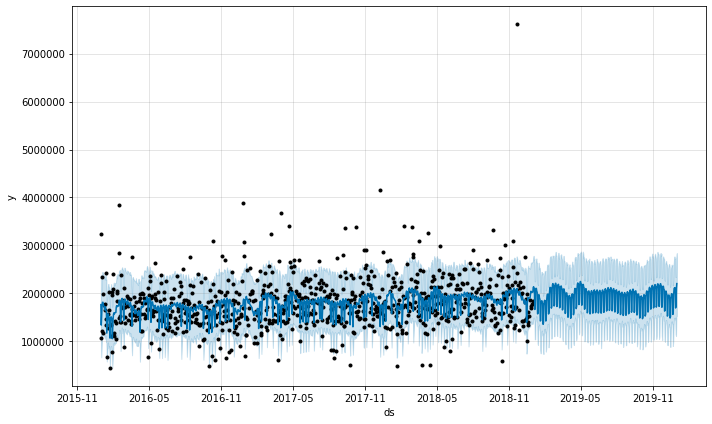

In [931]:

fig1=m.plot(forecast)

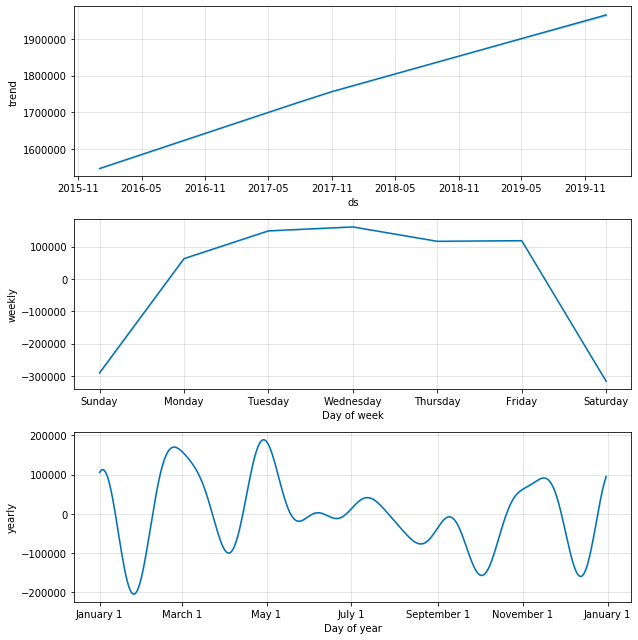

In [871]:
fig2 = m.plot_components(forecast)

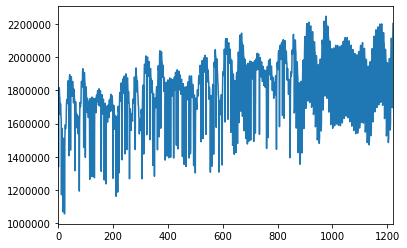

In [876]:
forecast.yhat.plot()


0       1.765130e+06
1       1.338219e+06
2       1.723522e+06
3       1.807913e+06
4       1.815717e+06
5       1.763840e+06
6       1.755475e+06
7       1.654426e+06
8       1.721066e+06
9       1.712810e+06
10      1.646910e+06
11      1.626859e+06
12      1.170428e+06
13      1.573244e+06
14      1.567571e+06
15      1.507186e+06
16      1.495458e+06
17      1.067678e+06
18      1.415340e+06
19      1.498794e+06
20      1.511761e+06
21      1.471049e+06
22      1.479629e+06
23      1.054685e+06
24      1.460220e+06
25      1.562551e+06
26      1.593131e+06
27      1.568464e+06
28      1.591267e+06
29      1.601727e+06
            ...     
1192    1.978019e+06
1193    2.048130e+06
1194    2.044885e+06
1195    1.985418e+06
1196    1.973090e+06
1197    1.525524e+06
1198    1.539744e+06
1199    1.882645e+06
1200    1.960218e+06
1201    1.966372e+06
1202    1.918123e+06
1203    1.918669e+06
1204    1.485422e+06
1205    1.515150e+06
1206    1.874459e+06
1207    1.969015e+06
1208    1.992

In [891]:
fore=forecast[['ds','yhat','yhat_lower','yhat_upper']]

In [894]:
fore.drop(['yhat_lower','yhat_upper'],axis=1,inplace=True)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  'level_0' (if 'index' is already taken) will be used.


In [907]:
fore.head()

ds          yhat CloseMonth
0 2016-01-01  1.765130e+06     2016-1
1 2016-01-02  1.338219e+06     2016-1
2 2016-01-04  1.723522e+06     2016-1
3 2016-01-05  1.807913e+06     2016-1
4 2016-01-06  1.815717e+06     2016-1

In [897]:
fore.head()

ds          yhat
0 2016-01-01  1.765130e+06
1 2016-01-02  1.338219e+06
2 2016-01-04  1.723522e+06
3 2016-01-05  1.807913e+06
4 2016-01-06  1.815717e+06

In [904]:
fore['CloseMonth'] = pd.to_datetime(fore.ds).apply(lambda x: "{}-{}".format(x.year,x.month))
test['CloseMonth'] = pd.to_datetime(test.ds).apply(lambda x: "{}-{}".format(x.year,x.month))

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [922]:
fore = fore[fore['CloseMonth']>'2019-1']

In [924]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot('ds','y',data=test)
ax.plot('ds','yhat',data=fore)
# ax.margins(x='2019-01',y=0)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


In [932]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

NameError: name 'go' is not defined